In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional



C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


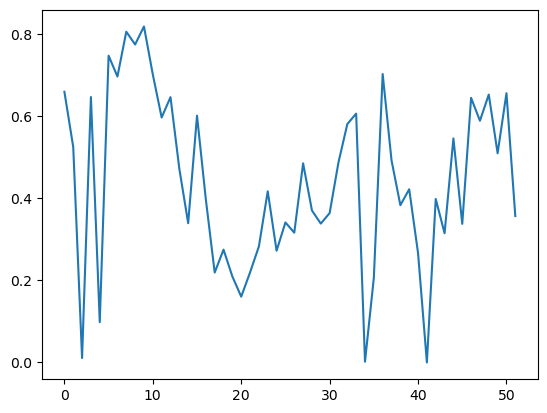

In [37]:
# Load the dataset
data = pd.read_csv('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p1.csv', usecols=[1])
plt.plot(data)

# Convert the NDVI data to a numpy array and normalize it
dataset = data.values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_normalized = scaler.fit_transform(dataset)



In [38]:
data

,NDVI_p1
0,0.659753
1,0.525199
2,0.010833
3,0.646873
4,0.098306
5,0.747664
6,0.696852
7,0.806154
8,0.774941
9,0.818840


In [39]:
# Define the number of time steps to consider in each input sequence
n_steps = 3

# Function to create sequences of data
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Create sequences for training
X_train_3, y_train_3 = create_sequences(dataset_normalized, n_steps)

# Reshape the input data to be compatible with the LSTM model
X_train_3 = X_train_3.reshape(X_train_3.shape[0], X_train_3.shape[1], 1)



In [40]:
# Define the Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')



In [41]:
# Train the model
model.fit(X_train_3, y_train_3, epochs=50, batch_size=32)



Epoch 1/50
2/2 [==============================] - 3s 7ms/step - loss: 0.3315
Epoch 2/50
2/2 [==============================] - 0s 9ms/step - loss: 0.3115
Epoch 3/50
2/2 [==============================] - 0s 8ms/step - loss: 0.2904
Epoch 4/50
2/2 [==============================] - 0s 11ms/step - loss: 0.2712
Epoch 5/50
2/2 [==============================] - 0s 7ms/step - loss: 0.2521
Epoch 6/50
2/2 [==============================] - 0s 6ms/step - loss: 0.2345
Epoch 7/50
2/2 [==============================] - 0s 8ms/step - loss: 0.2170
Epoch 8/50
2/2 [==============================] - 0s 7ms/step - loss: 0.2005
Epoch 9/50
2/2 [==============================] - 0s 6ms/step - loss: 0.1854
Epoch 10/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1696
Epoch 11/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1555
Epoch 12/50
2/2 [==============================] - 0s 9ms/step - loss: 0.1425
Epoch 13/50
2/2 [==============================] - 0s 6ms/step - loss: 0

In [42]:
# Generate predictions on the training data
y_pred_normalized_3 = model.predict(X_train_3)

# Inverse transform to get the original scale
y_pred_3 = scaler.inverse_transform(y_pred_normalized_3)




2/2 [==============================] - 1s 4ms/step


In [43]:
data = pd.read_csv('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p1.csv')

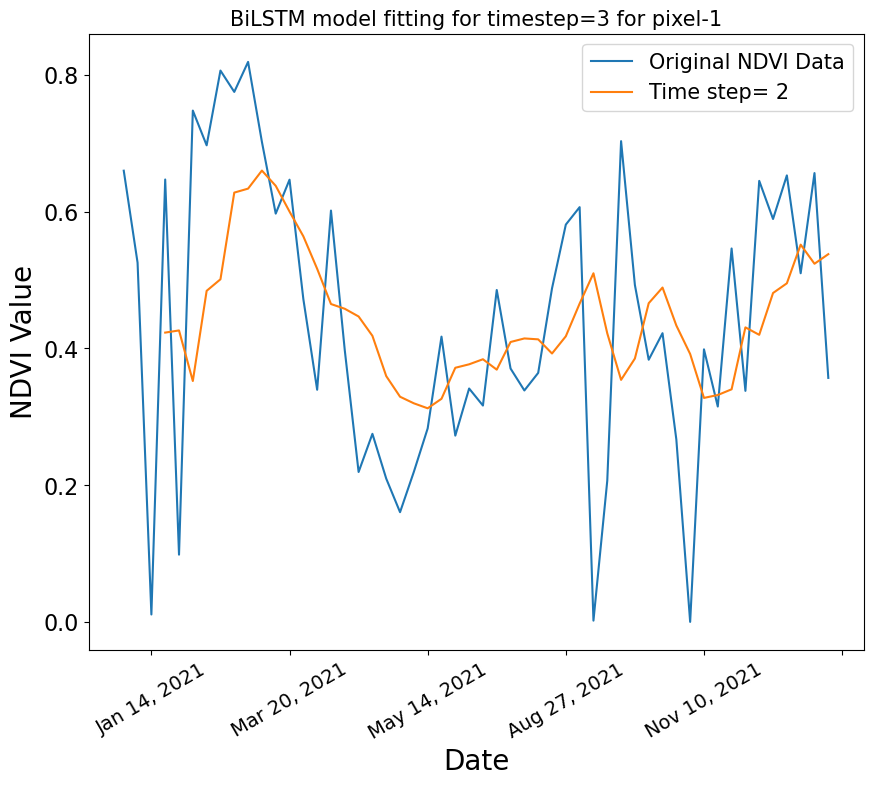

In [44]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.xticks(rotation=30,fontsize=14)
plt.yticks(fontsize=16)
# Plot the original NDVI data
plt.plot(data['date'], data['NDVI_p1'], label='Original NDVI Data')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Skip every 2 days
# Plot the predicted values
# Since you have the predictions for the first 'n_steps' data points, you need to leave some empty space (NaN) in the plot for them
empty_space = np.empty((n_steps, 1))
empty_space[:, :] = np.nan
plt.plot(np.concatenate([empty_space, y_pred_3]), label='Time step= 2')

# Set plot labels and title
plt.xlabel('Date',fontsize=20)
plt.ylabel('NDVI Value',fontsize=20)
plt.title('BiLSTM model fitting for timestep=3 for pixel-1',fontsize=15)
plt.legend(fontsize=15)
#plt.savefig('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/new graphs/lstm/Bi_lstm_p3_ts=3.png')
# Show the plot
plt.show()

## reverse sequence 

In [434]:
#loading of the data

data=pd.read_csv('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p2_reverse.csv')

#values put into different array
x = data['date'].values   #date
y = data['NDVI_p2_reverse'].values   #NDVI values

plt.figure(figsize=(30,7))
interval = np.arange(50)
plt.plot(x, y, 'b', label = 'No smoothing')
plt.xticks(rotation =30)

KeyError: 'NDVI_p2_reverse'

In [ ]:
# load the dataset
dataframe = pd.read_csv('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p1_reverse.csv', usecols=[1])
plt.figure(figsize=(30,7))
plt.plot(dataframe)

#Convert pandas dataframe to numpy array
dataset = dataframe.values
dataset = dataset.astype('float32') #COnvert values to float

dataset

In [436]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset using pandas read_csv
data = pd.read_csv('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p2_reverse.csv')

# Convert the NDVI data column to a NumPy array
ndvi_data = data['NDVI_p2_reversed'].values
ndvi_data = ndvi_data.reshape(-1, 1)

# Normalize the NDVI data to the range [0, 1] using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
ndvi_data_normalized = scaler.fit_transform(ndvi_data)

# Print the normalized NDVI data
print(ndvi_data_normalized)

[[0.18668545]
 [0.83551607]
 [0.67588286]
 [0.88832812]
 [0.73607459]
 [0.61191798]
 [0.4582032 ]
 [0.73813107]
 [0.48175963]
 [0.65157443]
 [0.        ]
 [0.49929569]
 [0.58837361]
 [0.45785571]
 [0.23714942]
 [0.13012656]
 [0.00463602]
 [0.76510877]
 [0.39098368]
 [0.28295998]
 [0.69993149]
 [0.79198014]
 [0.654042  ]
 [0.72567156]
 [0.78801405]
 [0.6430547 ]
 [0.32219878]
 [0.44786705]
 [0.4105543 ]
 [0.12396586]
 [0.13874166]
 [0.28274951]
 [0.22696125]
 [0.57648632]
 [0.43618585]
 [0.99472066]
 [0.97300805]
 [0.63770629]
 [0.81650452]
 [1.        ]
 [0.67256189]
 [0.87089182]
 [0.90576551]
 [0.99588264]
 [0.93951668]
 [0.86132521]
 [0.70577866]
 [0.38644099]
 [0.79294151]
 [0.03721366]
 [0.12154872]
 [0.84098067]]


In [437]:
# Define the number of time steps to consider in each input sequence
n_steps = 3

# Function to create sequences of data
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Create sequences for training
X_train, y_train = create_sequences(ndvi_data_normalized, n_steps)


In [438]:
# Create the LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu', input_shape=(n_steps, 1))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
2/2 [==============================] - 3s 21ms/step - loss: 0.4390
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 0.4124
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 0.3874
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 0.3640
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 0.3411
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 0.3207
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 0.3011
Epoch 8/100
2/2 [==============================] - 0s 18ms/step - loss: 0.2822
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 0.2645
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 0.2474
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - loss: 0.2304
Epoch 12/100
2/2 [==============================] - 0s 8ms/step - loss: 0.2143
Epoch 13/100
2/2 [==============================] - 0s 3m

In [439]:
# Function to generate predictions from the LSTM model
def generate_predictions(model, data, n_steps):
    predictions = []
    for i in range(len(data) - n_steps):
        x_input = data[i:i+n_steps].reshape(1, n_steps, 1)
        y_pred = model.predict(x_input)
        predictions.append(y_pred[0, 0])
    return np.array(predictions)

# Generate predictions
X_pred = ndvi_data_normalized[:n_steps].reshape(1, n_steps, 1)
y_pred_normalized = generate_predictions(model, ndvi_data_normalized, n_steps)

# Inverse transform to get the original scale
y_pred_2 = scaler.inverse_transform(y_pred_normalized.reshape(-1, 1))


1/1 [==============================] - 0s 31ms/step


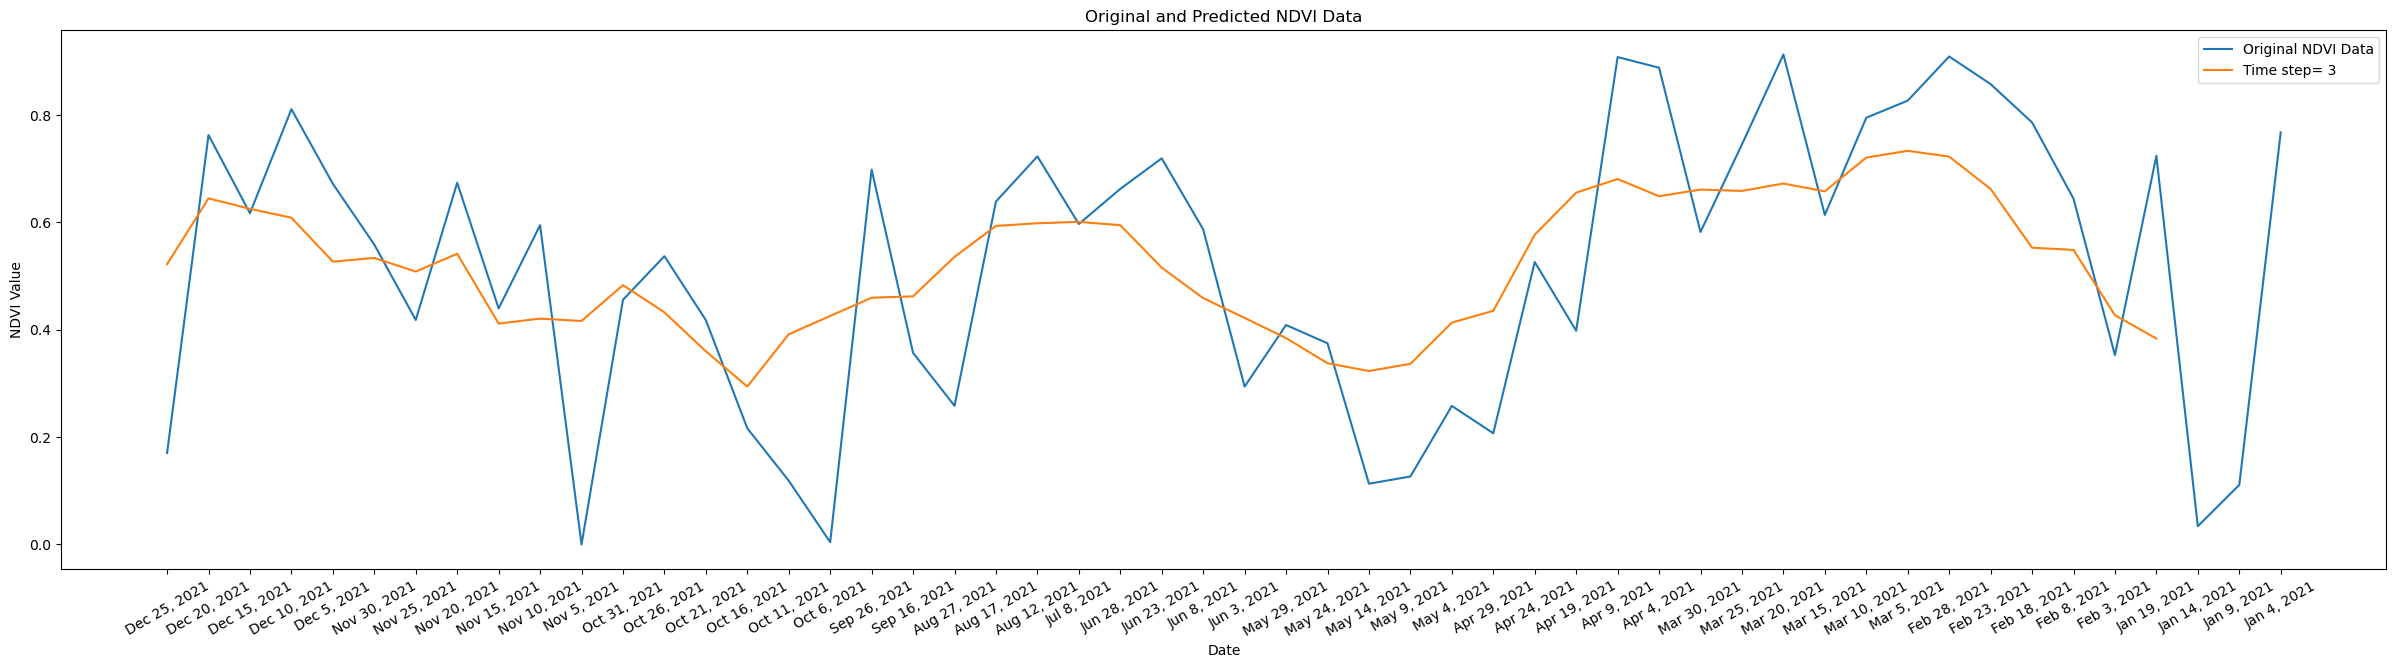

In [441]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 7))
plt.xticks(rotation=30)

# Plot the original NDVI data
plt.plot(data['date'], data['NDVI_p2_reversed'], label='Original NDVI Data') 

# Plot the predicted values
# Since you have the predictions for the first 'n_steps' data points, you need to leave some empty space (NaN) in the plot for them
empty_space = np.empty((n_steps, 1))
empty_space[:, :] = np.nan
plt.plot(np.concatenate([empty_space,y_pred_2][::-1]), label='Time step= 3')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.title('Original and Predicted NDVI Data')
plt.legend()

# Show the plot
plt.show()


## average 

In [442]:
a3 =np.concatenate([empty_space, y_pred_3])
b3= np.concatenate([empty_space,y_pred_2])
b3 = b3[::-1]
# Calculate the average of curves 'a' and 'b'
average_curve = (a3 + b3) / 2



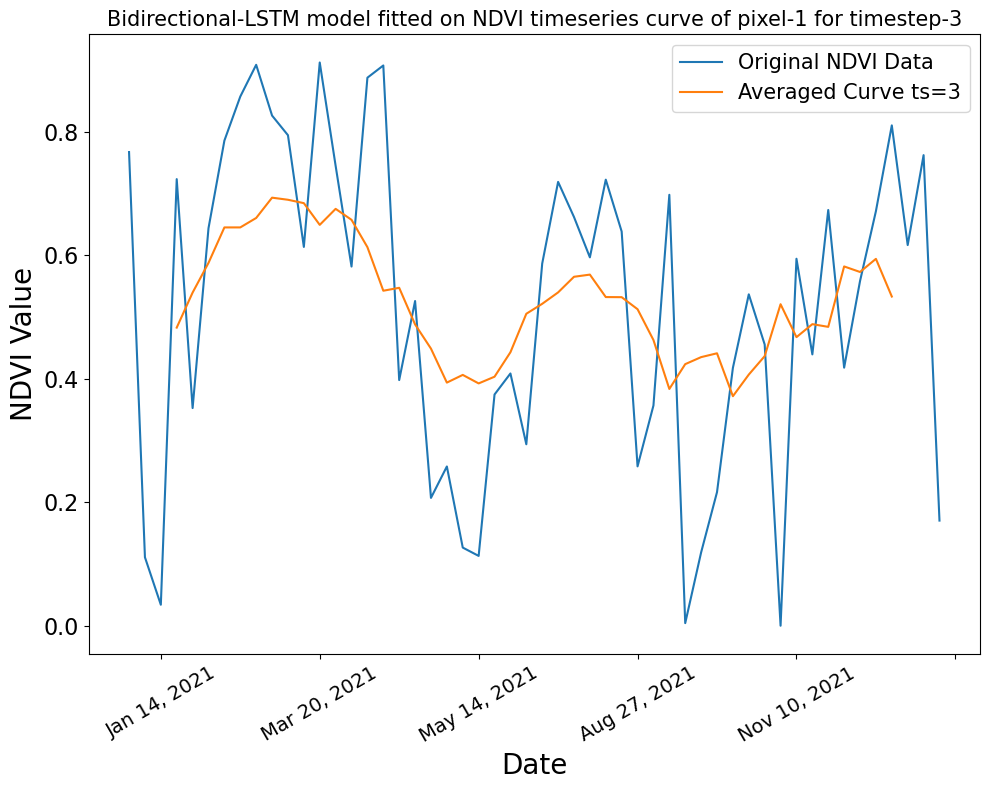

In [443]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))



reversed_time = data['date'][::-1]
reversed_average = average_curve  # Reverse the average curve as well
# Plot the original NDVI data
plt.plot(reversed_time, data['NDVI_p2_reversed'][::-1],label='Original NDVI Data')




# Plot the averaged curve over the original data
plt.plot(reversed_time, reversed_average, label='Averaged Curve ts=3')


plt.yticks(fontsize=16)
plt.xticks(rotation=30,fontsize =14)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Skip every 2 days
# Set plot labels and title
plt.xlabel('Date',fontsize=20)
plt.ylabel('NDVI Value',fontsize=20)

plt.title('Bidirectional-LSTM model fitted on NDVI timeseries curve of pixel-1 for timestep-3',fontsize=15)
plt.tight_layout()
plt.legend(fontsize=15)

plt.savefig('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/new graphs/lstm/Bilstm_pt2_average curve ts=3.png') 
# Show the plot
plt.show()


# timestep=5



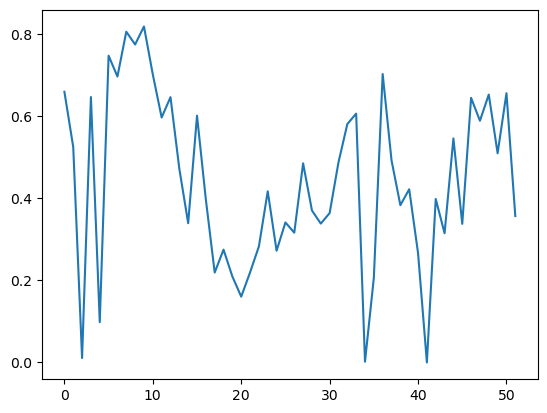

In [45]:
# Load the dataset
data = pd.read_csv('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p1.csv', usecols=[1])
plt.plot(data)

# Convert the NDVI data to a numpy array and normalize it
dataset = data.values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_normalized = scaler.fit_transform(dataset)



In [46]:
# Define the number of time steps to consider in each input sequence
n_steps = 5

# Function to create sequences of data
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Create sequences for training
X_train_5, y_train_5 = create_sequences(dataset_normalized, n_steps)

# Reshape the input data to be compatible with the LSTM model
X_train_5 = X_train_5.reshape(X_train_5.shape[0], X_train_5.shape[1], 1)



In [47]:
# Define the Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')



In [48]:
# Train the model
model.fit(X_train_5, y_train_5, epochs=50, batch_size=32)



Epoch 1/50
2/2 [==============================] - 3s 20ms/step - loss: 0.3607
Epoch 2/50
2/2 [==============================] - 0s 8ms/step - loss: 0.3288
Epoch 3/50
2/2 [==============================] - 0s 5ms/step - loss: 0.3011
Epoch 4/50
2/2 [==============================] - 0s 9ms/step - loss: 0.2739
Epoch 5/50
2/2 [==============================] - 0s 9ms/step - loss: 0.2480
Epoch 6/50
2/2 [==============================] - 0s 7ms/step - loss: 0.2230
Epoch 7/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1976
Epoch 8/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1747
Epoch 9/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1526
Epoch 10/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1310
Epoch 11/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1121
Epoch 12/50
2/2 [==============================] - 0s 0s/step - loss: 0.0950
Epoch 13/50
2/2 [==============================] - 0s 6ms/step - loss: 0.

In [49]:
# Generate predictions on the training data
y_pred_normalized_5 = model.predict(X_train_5)

# Inverse transform to get the original scale
y_pred_5_for = scaler.inverse_transform(y_pred_normalized_5)




2/2 [==============================] - 0s 4ms/step


In [50]:
data = pd.read_csv('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p1.csv')

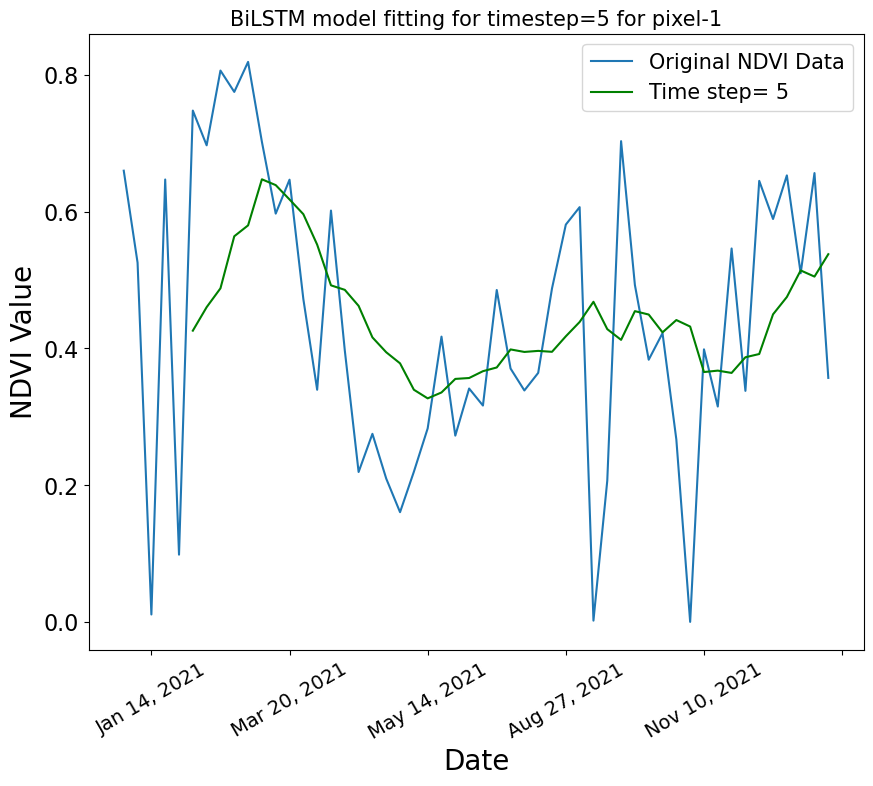

In [51]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.xticks(rotation=30,fontsize=14)
plt.yticks(fontsize=16)
# Plot the original NDVI data
plt.plot(data['date'], data['NDVI_p1'], label='Original NDVI Data')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Skip every 2 days
# Plot the predicted values
# Since you have the predictions for the first 'n_steps' data points, you need to leave some empty space (NaN) in the plot for them
empty_space = np.empty((n_steps, 1))
empty_space[:, :] = np.nan
plt.plot(np.concatenate([empty_space, y_pred_5_for]),'green', label='Time step= 5')

# Set plot labels and title
plt.xlabel('Date',fontsize=20)
plt.ylabel('NDVI Value',fontsize=20)
plt.title('BiLSTM model fitting for timestep=5 for pixel-1',fontsize=15)
plt.legend(fontsize=15)
#plt.savefig('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/new graphs/lstm/Bi_lstm_p3_ts=5.png')
# Show the plot
plt.show()

In [17]:
u= np.concatenate([empty_space, y_pred_3])
v=np.concatenate([empty_space, y_pred_5_for])

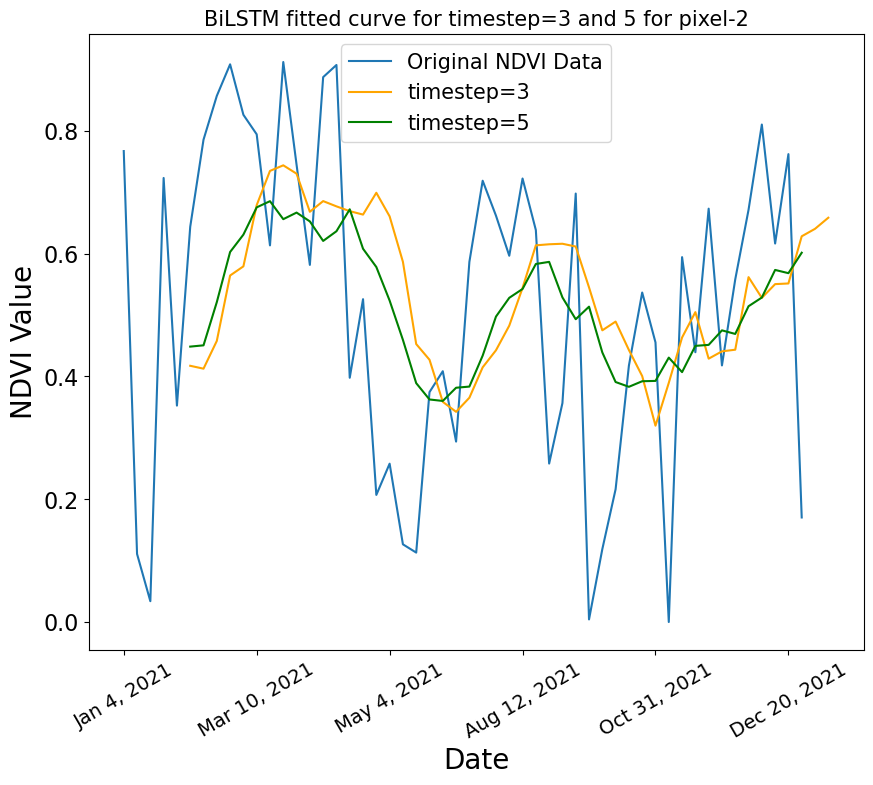

In [19]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.yticks(fontsize=16)
plt.xticks(rotation=30,fontsize=14)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
# Plot the original NDVI data
plt.plot(data['date'], data['NDVI_p2'], label='Original NDVI Data')

# Plot the predicted values
# Since you have the predictions for the first 'n_steps' data points, you need to leave some empty space (NaN) in the plot for them
plt.plot(u ,"orange", label="timestep=3")
plt.plot(v ,"green", label="timestep=5")

plt.xlabel('Date', fontsize=20)
plt.ylabel('NDVI Value', fontsize=20)
plt.title('BiLSTM fitted curve for timestep=3 and 5 for pixel-2', fontsize=15)
plt.legend(fontsize=15)
plt.savefig('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/new graphs/lstm/Bilstm_p2_ts=5 and 3.png')
# Show the plot
plt.show()


## reverse 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

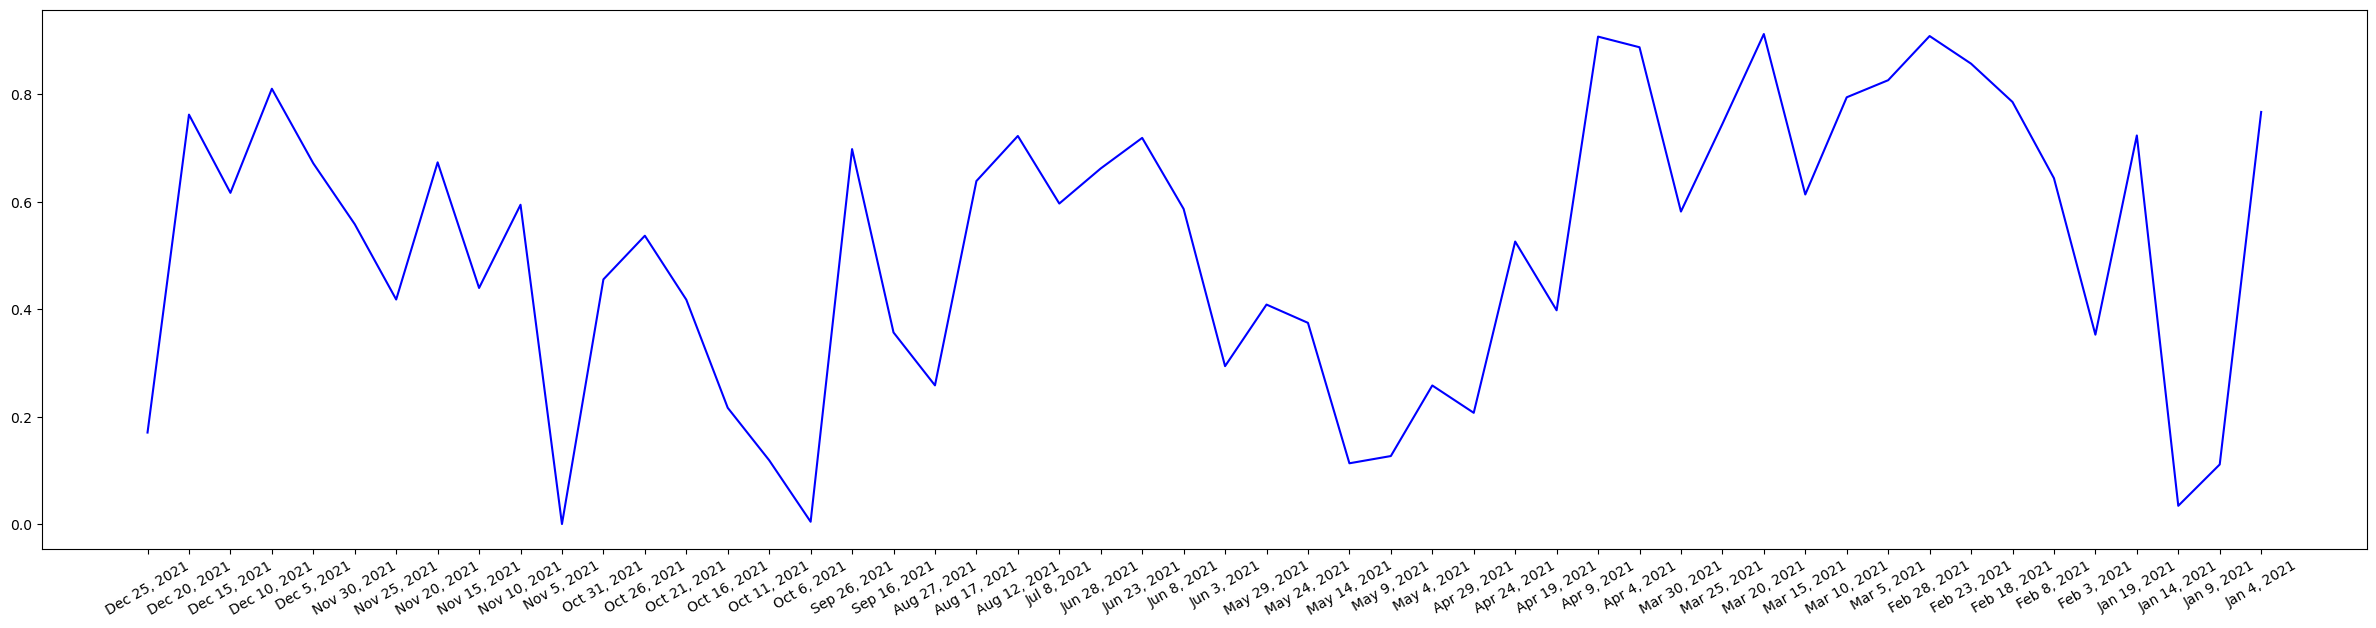

In [452]:
#loading of the data

data=pd.read_csv('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p2_reverse.csv')

#values put into different array
x = data['date'].values   #date
y = data['NDVI_p2_reversed'].values   #NDVI values

plt.figure(figsize=(30,7))
interval = np.arange(50)
plt.plot(x, y, 'b', label = 'No smoothing')
plt.xticks(rotation =30)

array([[0.170301  ],
       [0.762187  ],
       [0.616564  ],
       [0.810364  ],
       [0.671473  ],
       [0.558213  ],
       [0.417989  ],
       [0.673349  ],
       [0.439478  ],
       [0.594389  ],
       [0.        ],
       [0.455475  ],
       [0.536735  ],
       [0.417672  ],
       [0.216336  ],
       [0.118706  ],
       [0.00422914],
       [0.697959  ],
       [0.356669  ],
       [0.258126  ],
       [0.638502  ],
       [0.722472  ],
       [0.59664   ],
       [0.661983  ],
       [0.718854  ],
       [0.586617  ],
       [0.293921  ],
       [0.40856   ],
       [0.374522  ],
       [0.113086  ],
       [0.126565  ],
       [0.257934  ],
       [0.207042  ],
       [0.525891  ],
       [0.397904  ],
       [0.907419  ],
       [0.887612  ],
       [0.581738  ],
       [0.744844  ],
       [0.912235  ],
       [0.6135345 ],
       [0.794458  ],
       [0.826271  ],
       [0.908479  ],
       [0.85706   ],
       [0.785731  ],
       [0.643836  ],
       [0.352

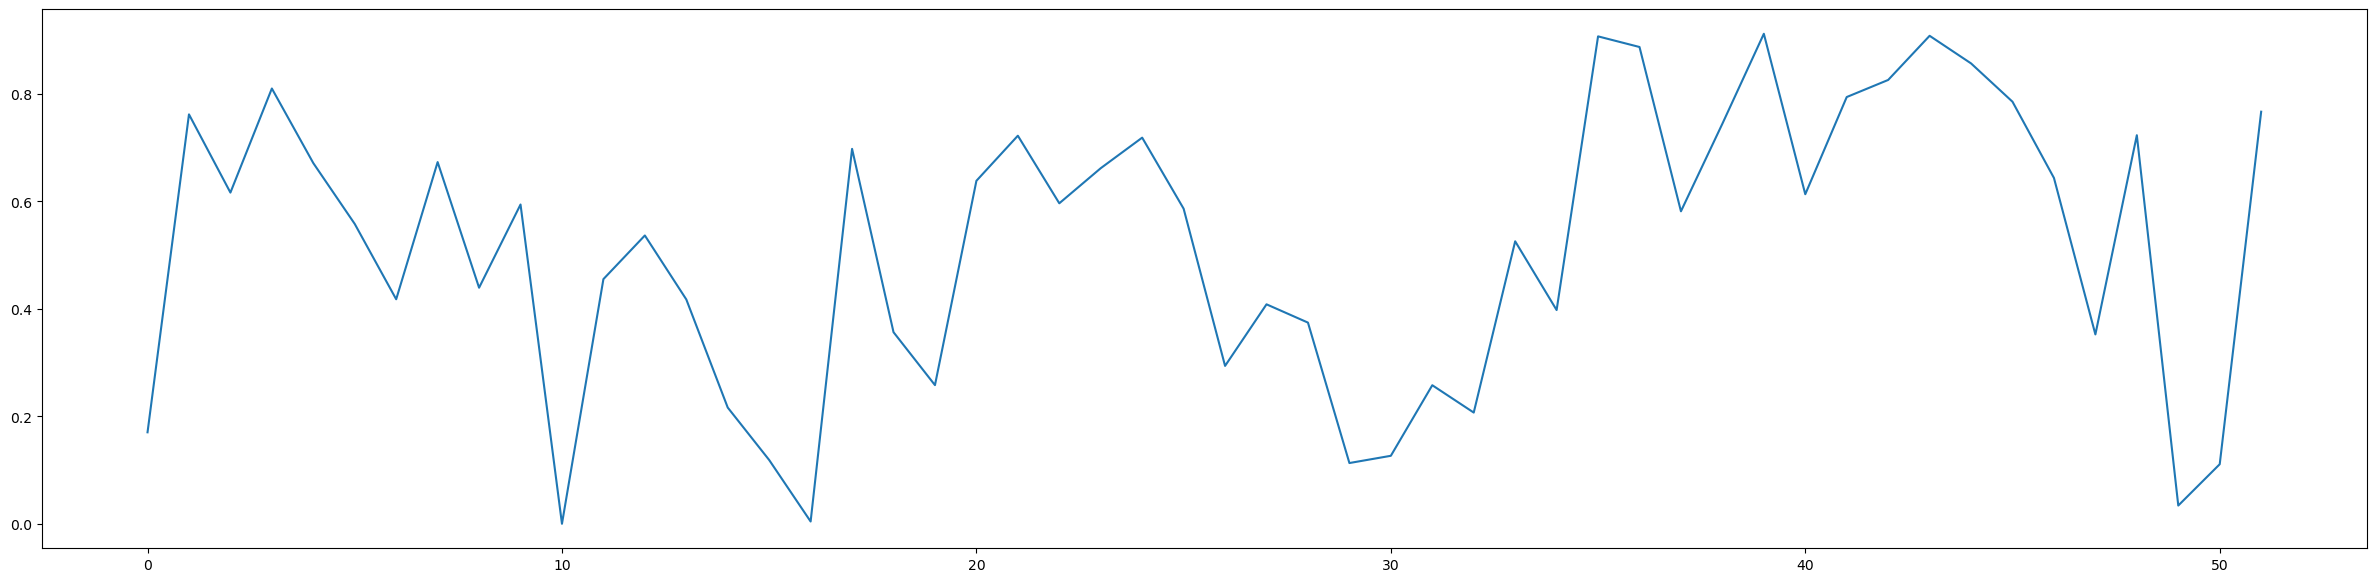

In [453]:
# load the dataset
dataframe = pd.read_csv('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p2_reverse.csv', usecols=[1])
plt.figure(figsize=(30,7))
plt.plot(dataframe)

#Convert pandas dataframe to numpy array
dataset = dataframe.values
dataset = dataset.astype('float32') #COnvert values to float

dataset

In [454]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset using pandas read_csv
data = pd.read_csv('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p2_reverse.csv')

# Convert the NDVI data column to a NumPy array
ndvi_data = data['NDVI_p2_reversed'].values
ndvi_data = ndvi_data.reshape(-1, 1)

# Normalize the NDVI data to the range [0, 1] using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
ndvi_data_normalized = scaler.fit_transform(ndvi_data)

# Print the normalized NDVI data
print(ndvi_data_normalized)

[[0.18668545]
 [0.83551607]
 [0.67588286]
 [0.88832812]
 [0.73607459]
 [0.61191798]
 [0.4582032 ]
 [0.73813107]
 [0.48175963]
 [0.65157443]
 [0.        ]
 [0.49929569]
 [0.58837361]
 [0.45785571]
 [0.23714942]
 [0.13012656]
 [0.00463602]
 [0.76510877]
 [0.39098368]
 [0.28295998]
 [0.69993149]
 [0.79198014]
 [0.654042  ]
 [0.72567156]
 [0.78801405]
 [0.6430547 ]
 [0.32219878]
 [0.44786705]
 [0.4105543 ]
 [0.12396586]
 [0.13874166]
 [0.28274951]
 [0.22696125]
 [0.57648632]
 [0.43618585]
 [0.99472066]
 [0.97300805]
 [0.63770629]
 [0.81650452]
 [1.        ]
 [0.67256189]
 [0.87089182]
 [0.90576551]
 [0.99588264]
 [0.93951668]
 [0.86132521]
 [0.70577866]
 [0.38644099]
 [0.79294151]
 [0.03721366]
 [0.12154872]
 [0.84098067]]


In [455]:
# Define the number of time steps to consider in each input sequence
n_steps = 5

# Function to create sequences of data
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Create sequences for training
X_train, y_train = create_sequences(ndvi_data_normalized, n_steps)


In [456]:
# Create the LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu', input_shape=(n_steps, 1))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
2/2 [==============================] - 3s 16ms/step - loss: 0.4439
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 0.4107
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3801
Epoch 4/100
2/2 [==============================] - 0s 0s/step - loss: 0.3501
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 0.3268
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 0.3012
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 0.2786
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 0.2564
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 0.2370
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 0.2170
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - loss: 0.1973
Epoch 12/100
2/2 [==============================] - 0s 7ms/step - loss: 0.1791
Epoch 13/100
2/2 [==============================] - 0s 8ms/

In [407]:
# Function to generate predictions from the LSTM model
def generate_predictions(model, data, n_steps):
    predictions = []
    for i in range(len(data) - n_steps):
        x_input = data[i:i+n_steps].reshape(1, n_steps, 1)
        y_pred = model.predict(x_input)
        predictions.append(y_pred[0, 0])
    return np.array(predictions)

# Generate predictions
X_pred = ndvi_data_normalized[:n_steps].reshape(1, n_steps, 1)
y_pred_normalized = generate_predictions(model, ndvi_data_normalized, n_steps)

# Inverse transform to get the original scale
y_pred_5_rev = scaler.inverse_transform(y_pred_normalized.reshape(-1, 1))


1/1 [==============================] - 0s 24ms/step


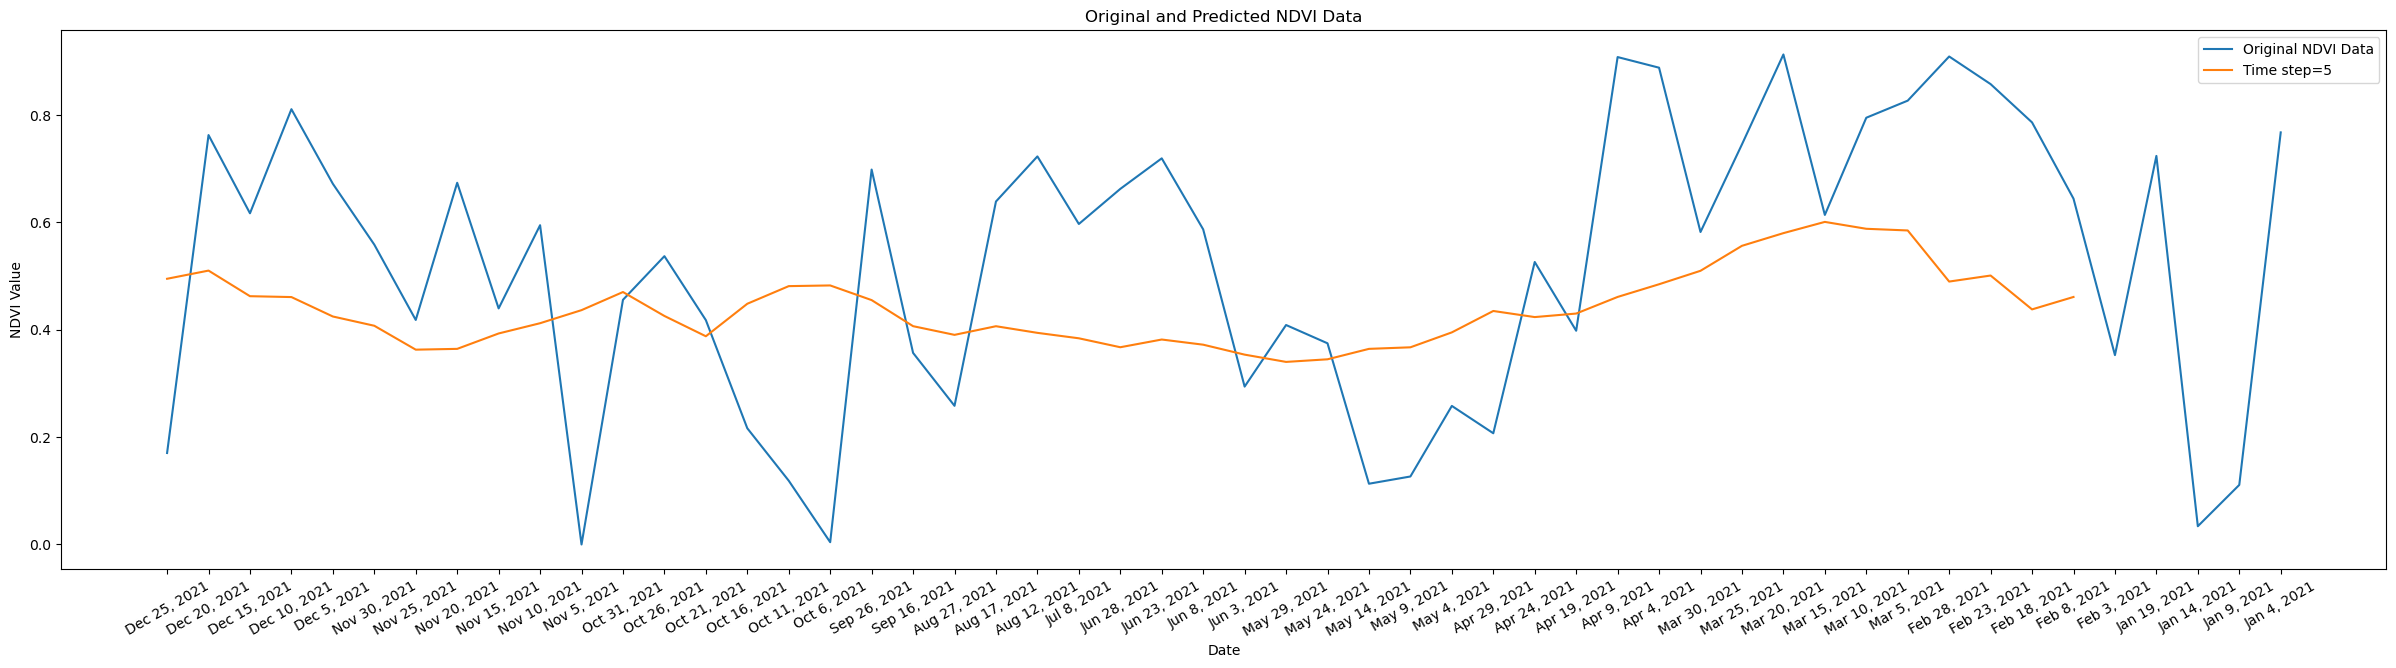

In [458]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 7))
plt.xticks(rotation=30)

# Plot the original NDVI data
plt.plot(data['date'], data['NDVI_p2_reversed'], label='Original NDVI Data') 

# Plot the predicted values
# Since you have the predictions for the first 'n_steps' data points, you need to leave some empty space (NaN) in the plot for them
empty_space = np.empty((n_steps, 1))
empty_space[:, :] = np.nan
plt.plot(np.concatenate([empty_space,y_pred_5_rev][::-1]), label='Time step=5')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.title('Original and Predicted NDVI Data')
plt.legend()

# Show the plot
plt.show()


## average 

In [459]:
a5 =np.concatenate([empty_space,y_pred_5_for])
b5= np.concatenate([empty_space,y_pred_5_rev])
b5 = b5[::-1]
# Calculate the average of curves 'a' and 'b'
average_curve = (a5 + b5) / 2



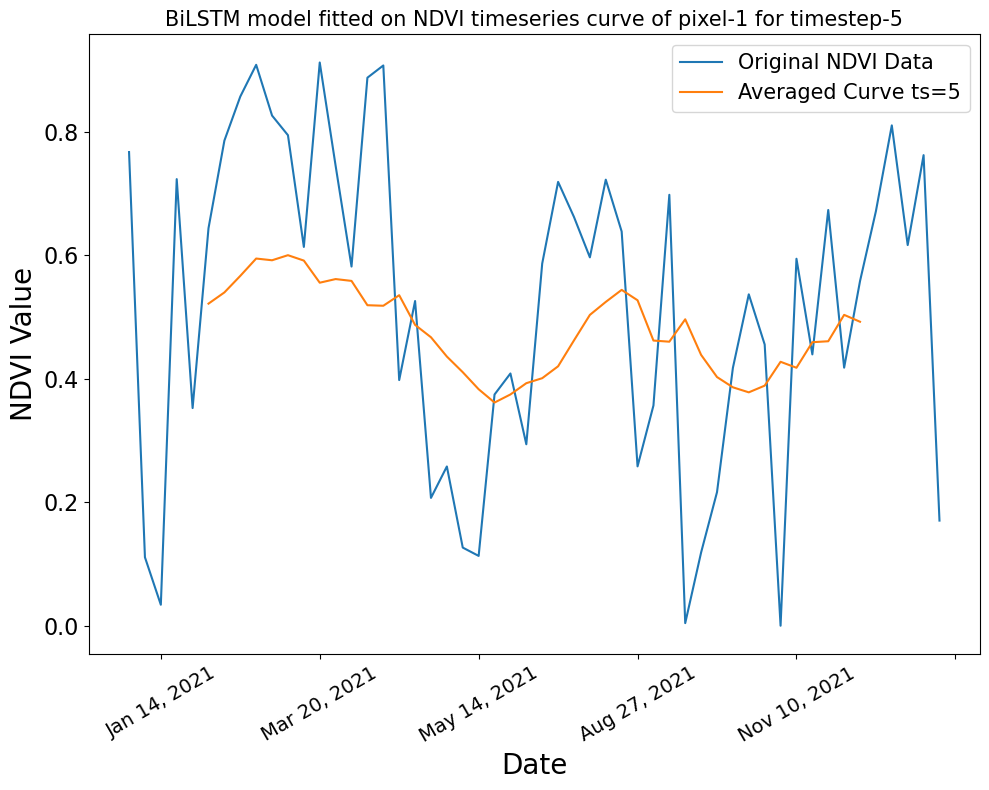

In [460]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))



reversed_time = data['date'][::-1]
reversed_average = average_curve  # Reverse the average curve as well
# Plot the original NDVI data
plt.plot(reversed_time, data['NDVI_p2_reversed'][::-1],label='Original NDVI Data')




# Plot the averaged curve over the original data
plt.plot(reversed_time, reversed_average, label='Averaged Curve ts=5')


plt.yticks(fontsize=16)
plt.xticks(rotation=30,fontsize =14)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Skip every 2 days
# Set plot labels and title
plt.xlabel('Date',fontsize=20)
plt.ylabel('NDVI Value',fontsize=20)

plt.title('BiLSTM model fitted on NDVI timeseries curve of pixel-1 for timestep-5',fontsize=15)
plt.tight_layout()
plt.legend(fontsize=15)

plt.savefig('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/new graphs/lstm/Bilstm_pt1_average curve ts=5.png') 
# Show the plot
plt.show()

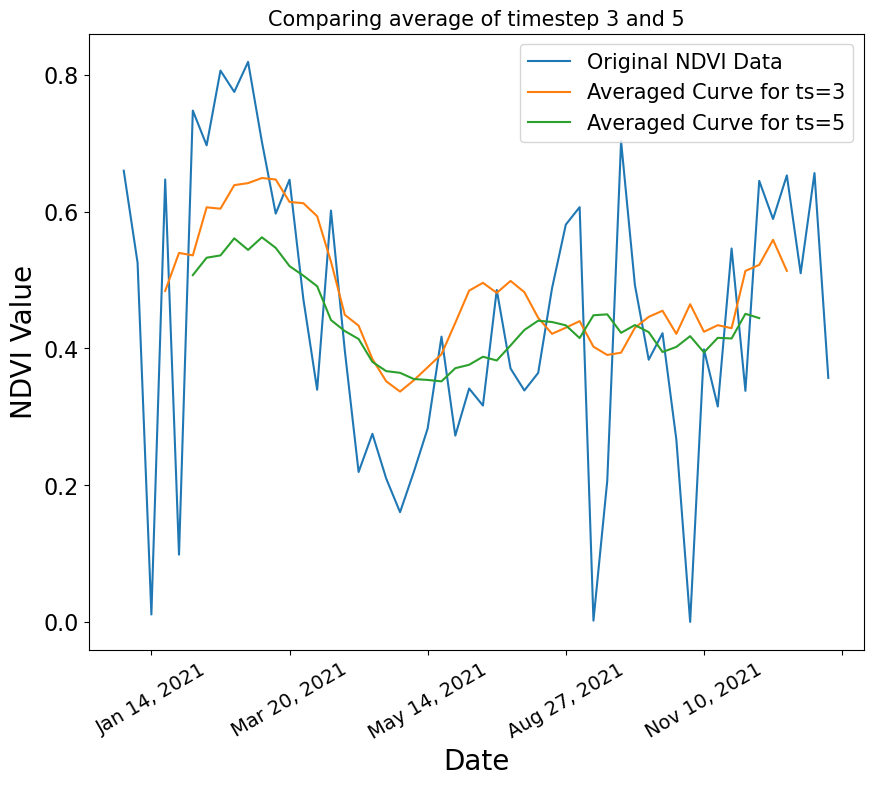

In [411]:
a_avg=average_curve = (a3 + b3) / 2
b_avg=average_curve5 = (a5 + b5) / 2

plt.figure(figsize=(10, 8))
plt.xticks(rotation=30,fontsize=14)
plt.yticks(fontsize=16)



# Plot the averaged curve over the original data
plt.plot(reversed_time, data['NDVI_p1_reverse'][::-1],label='Original NDVI Data')

plt.plot(reversed_time, a_avg, label='Averaged Curve for ts=3')


plt.plot(reversed_time, b_avg, label='Averaged Curve for ts=5')


plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Skip every 2 days
# Set plot labels and title
plt.xlabel('Date',fontsize=20)
plt.ylabel('NDVI Value',fontsize=20)
plt.title('Comparing average of timestep 3 and 5',fontsize=15)
plt.legend(fontsize=15)
plt.savefig('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/new graphs/lstm/Bilstm_pt1_average curve ts=5 and 3.png') 
# Show the plot
plt.show()


# timestep=10

In [38]:
# Define the number of time steps to consider in each input sequence
n_steps = 10

# Function to create sequences of data
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Create sequences for training
X_train_10, y_train_10 = create_sequences(dataset_normalized, n_steps)

# Reshape the input data to be compatible with the LSTM model
X_train_10= X_train_10.reshape(X_train_10.shape[0], X_train_10.shape[1], 1)



In [39]:
# Define the Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')



In [40]:
# Train the model
model.fit(X_train_10, y_train_10, epochs=50, batch_size=32)



Epoch 1/50
2/2 [==============================] - 3s 26ms/step - loss: 0.3217
Epoch 2/50
2/2 [==============================] - 0s 11ms/step - loss: 0.2872
Epoch 3/50
2/2 [==============================] - 0s 19ms/step - loss: 0.2546
Epoch 4/50
2/2 [==============================] - 0s 11ms/step - loss: 0.2263
Epoch 5/50
2/2 [==============================] - 0s 7ms/step - loss: 0.2009
Epoch 6/50
2/2 [==============================] - 0s 10ms/step - loss: 0.1772
Epoch 7/50
2/2 [==============================] - 0s 17ms/step - loss: 0.1545
Epoch 8/50
2/2 [==============================] - 0s 12ms/step - loss: 0.1348
Epoch 9/50
2/2 [==============================] - 0s 12ms/step - loss: 0.1165
Epoch 10/50
2/2 [==============================] - 0s 17ms/step - loss: 0.0997
Epoch 11/50
2/2 [==============================] - 0s 16ms/step - loss: 0.0848
Epoch 12/50
2/2 [==============================] - 0s 21ms/step - loss: 0.0709
Epoch 13/50
2/2 [==============================] - 0s 21ms/ste

In [41]:
# Generate predictions on the training data
y_pred_normalized_10 = model.predict(X_train_10)

# Inverse transform to get the original scale
y_pred_10 = scaler.inverse_transform(y_pred_normalized_10)




2/2 [==============================] - 0s 5ms/step


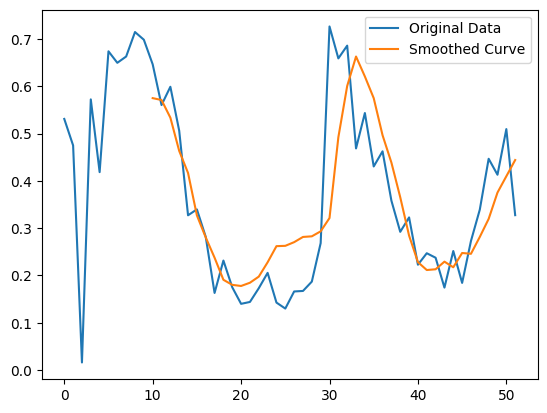

In [26]:
# Plot the original data and the smoothed curve
plt.plot(data, label='Original Data')
plt.plot(range(n_steps, len(y_pred)+n_steps), y_pred, label='Smoothed Curve')
plt.legend()
plt.show()


Current Working Directory: E:\pgd\PGD-GI Study Material\final project\NDVI\python docs\2-08-2023\2-08-2023


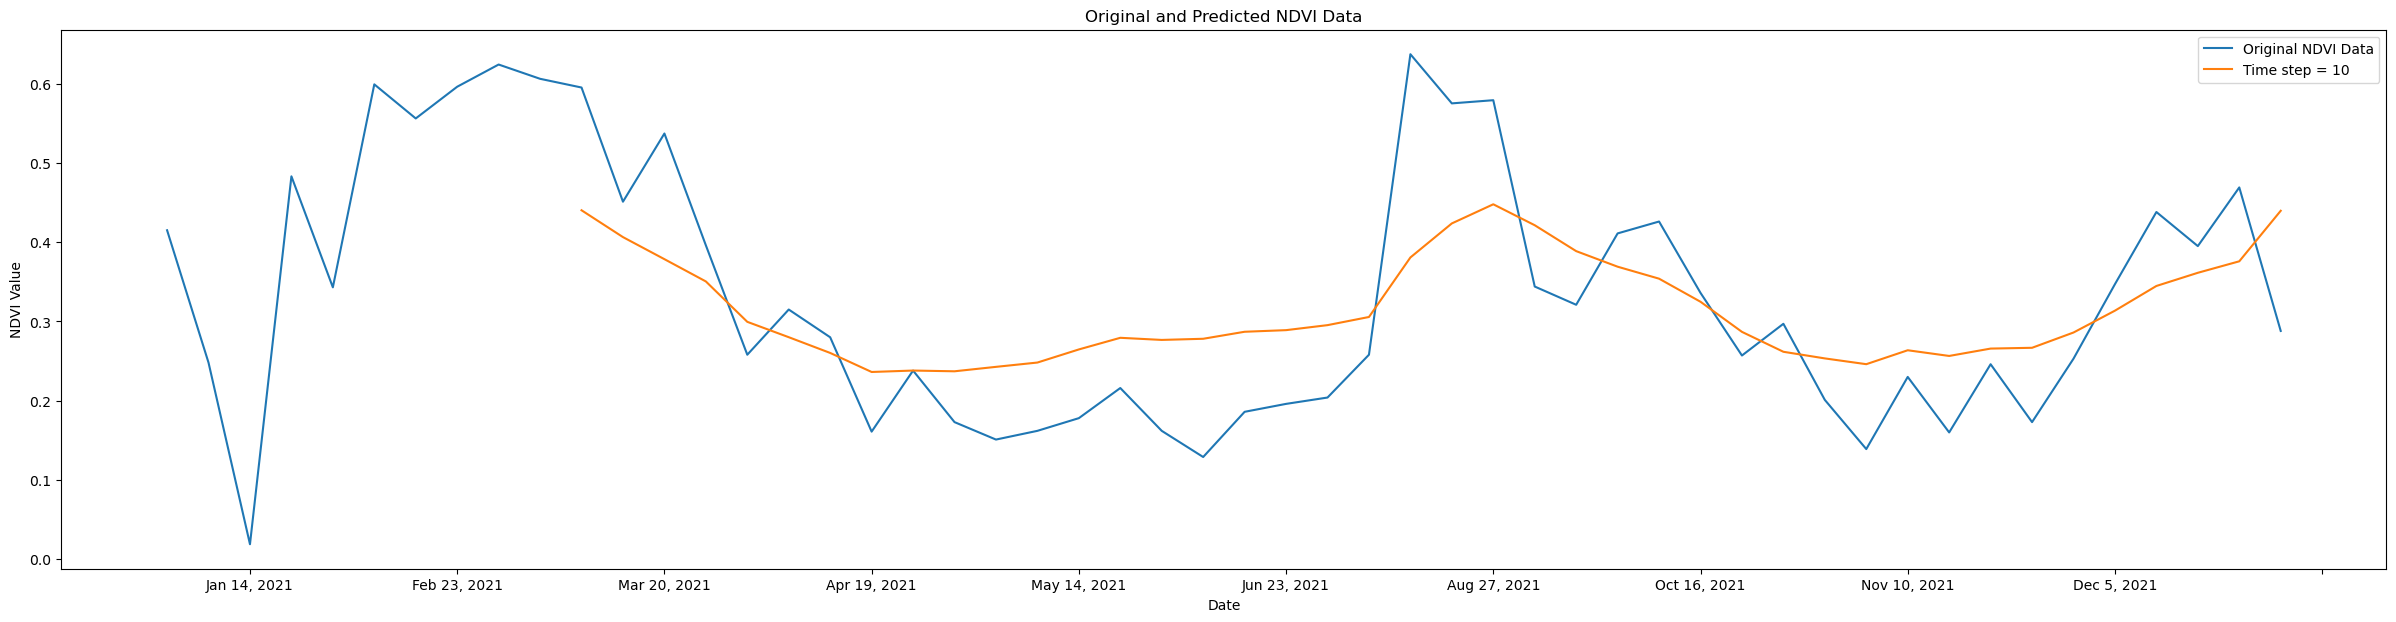

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,7))
#plt.xticks(rotation =30)
# Plot the original NDVI data
plt.plot(data['system:time_start'], data['0'], label='Original NDVI Data')

# Plot the predicted values
# Since you have the predictions for the first 'n_steps' data points, you need to leave some empty space (NaN) in the plot for them
empty_space = np.empty((n_steps, 1))
empty_space[:, :] = np.nan
shifted_y_pred_10 = np.roll(y_pred_10, -1)
plt.plot(np.concatenate([empty_space, shifted_y_pred_10]), label='Time step = 10')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Skip every 2 days

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.title('Original and Predicted NDVI Data')
plt.legend()

import os

# ... (rest of your code)

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Save the graph as a JPEG file
file_path = "E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/bidirectional_lstm 3.jpeg"
plt.savefig(file_path, format='jpeg')

# Show the plot
plt.show()


# Show the plot
plt.show()

# checking the working of lstm wrt to discontinuous data 


In [149]:
# In this part i have removed 20 rows from the original dataframe 
#first we will define a new data frame which contains all the samples from the 
new_df = pd.DataFrame(data)
print (new_df)
new_df.shape[0]

   system:time_start      0
0        Jan 4, 2021  0.415
1        Jan 9, 2021  0.248
2       Jan 14, 2021  0.019
3       Jan 19, 2021  0.483
4        Feb 3, 2021  0.343
5        Feb 8, 2021  0.599
6       Feb 18, 2021  0.556
7       Feb 23, 2021  0.596
8       Feb 28, 2021  0.624
9        Mar 5, 2021  0.606
10      Mar 10, 2021  0.595
11      Mar 15, 2021  0.451
12      Mar 20, 2021  0.537
13      Mar 25, 2021  0.396
14      Mar 30, 2021  0.258
15       Apr 4, 2021  0.315
16       Apr 9, 2021  0.280
17      Apr 19, 2021  0.161
18      Apr 24, 2021  0.238
19      Apr 29, 2021  0.173
20       May 4, 2021  0.151
21       May 9, 2021  0.162
22      May 14, 2021  0.178
23      May 24, 2021  0.216
24      May 29, 2021  0.162
25       Jun 3, 2021  0.129
26       Jun 8, 2021  0.186
27      Jun 23, 2021  0.196
28      Jun 28, 2021  0.204
29       Jul 8, 2021  0.258
30      Aug 12, 2021  0.637
31      Aug 17, 2021  0.575
32      Aug 27, 2021  0.579
33      Sep 16, 2021  0.344
34      Sep 26, 2021

52

In [150]:
n_remove = 20
df1 = new_df.sample(n=len(new_df)-n_remove).sort_index()  # the code creates a new DataFrame df1, which is a random subset of the original DataFrame new_df, but with n_remove rows removed. The order of the remaining rows in df1 is preserved as they were in the original DataFrame new_df. The number of rows in df1 will be len(new_df) - n_remove.
df1

,system:time_start,0
0,"Jan 4, 2021",0.415
1,"Jan 9, 2021",0.248
2,"Jan 14, 2021",0.019
6,"Feb 18, 2021",0.556
7,"Feb 23, 2021",0.596
8,"Feb 28, 2021",0.624
9,"Mar 5, 2021",0.606
11,"Mar 15, 2021",0.451
12,"Mar 20, 2021",0.537
13,"Mar 25, 2021",0.396


In [151]:
# then like above we create the array for each column x1 and y1
x1 = df1['system:time_start'].values   #date
y1 = df1['0'].values   #NDVI values


In [152]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming you have already created a subset DataFrame and stored it as 'data'
# Replace 'column_name' with the actual name of the column you want to use
column_values = df1['0'].values

# Convert the column values to a numpy array and reshape it to a 2D array
# This is important to ensure compatibility with MinMaxScaler
dataset = column_values.astype('float32').reshape(-1, 1)

# Normalize the data to the range [0, 1] using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_normalized = scaler.fit_transform(dataset)

# Now you can continue with the rest of your code using 'dataset_normalized'


In [153]:
# Define the number of time steps to consider in each input sequence
n_steps = 3

# Function to create sequences of data
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Create sequences for training
X_train_3, y_train_3 = create_sequences(dataset_normalized, n_steps)

# Reshape the input data to be compatible with the LSTM model
X_train_3 = X_train_3.reshape(X_train_3.shape[0], X_train_3.shape[1], 1)



In [154]:
# Define the Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')



In [155]:
# Train the model
model.fit(X_train_3, y_train_3, epochs=50, batch_size=32)



Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.2865
Epoch 2/50
1/1 [==============================] - 0s 10ms/step - loss: 0.2786
Epoch 3/50
1/1 [==============================] - 0s 15ms/step - loss: 0.2710
Epoch 4/50
1/1 [==============================] - 0s 9ms/step - loss: 0.2634
Epoch 5/50
1/1 [==============================] - 0s 16ms/step - loss: 0.2559
Epoch 6/50
1/1 [==============================] - 0s 19ms/step - loss: 0.2486
Epoch 7/50
1/1 [==============================] - 0s 19ms/step - loss: 0.2414
Epoch 8/50
1/1 [==============================] - 0s 12ms/step - loss: 0.2343
Epoch 9/50
1/1 [==============================] - 0s 15ms/step - loss: 0.2274
Epoch 10/50
1/1 [==============================] - 0s 18ms/step - loss: 0.2205
Epoch 11/50
1/1 [==============================] - 0s 14ms/step - loss: 0.2138
Epoch 12/50
1/1 [==============================] - 0s 11ms/step - loss: 0.2072
Epoch 13/50
1/1 [==============================] - 0s 17ms/step 

In [157]:
# Generate predictions on the training data
y_pred_normalized_3 = model.predict(X_train_3)

# Inverse transform to get the original scale
y_pred_3 = scaler.inverse_transform(y_pred_normalized_3)


1/1 [==============================] - 0s 33ms/step


Current Working Directory: E:\pgd\PGD-GI Study Material\final project\NDVI\python docs\2-08-2023\2-08-2023


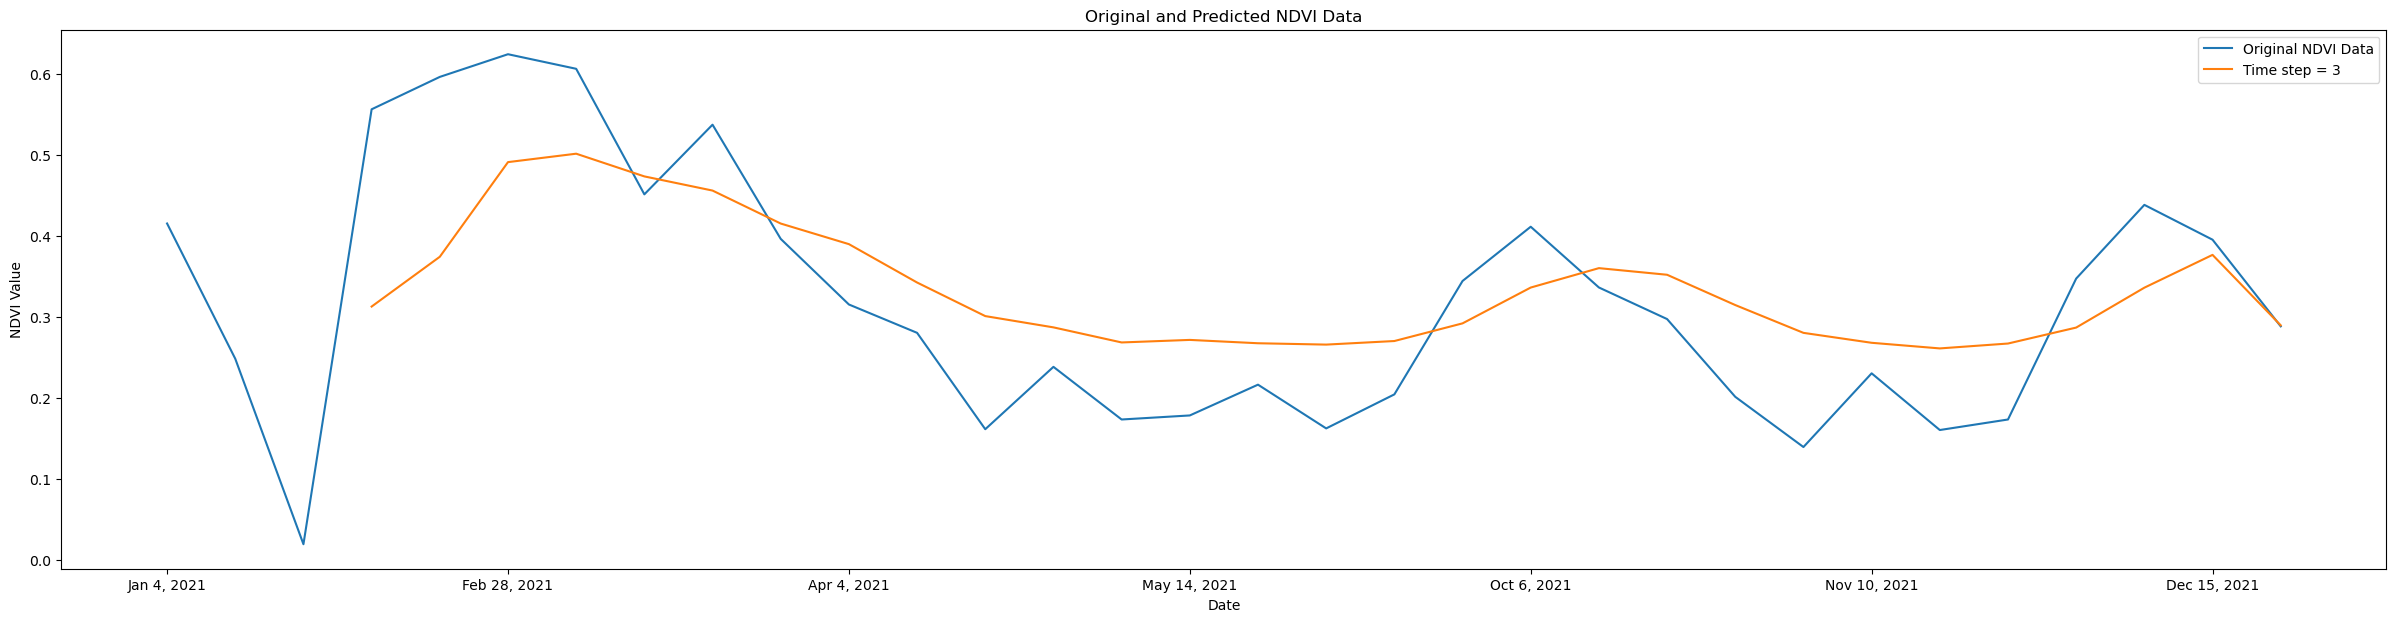

In [158]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,7))
#plt.xticks(rotation =30)
# Plot the original NDVI data
plt.plot(df1['system:time_start'], df1['0'], label='Original NDVI Data')

# Plot the predicted values
# Since you have the predictions for the first 'n_steps' data points, you need to leave some empty space (NaN) in the plot for them
empty_space = np.empty((n_steps, 1))
empty_space[:, :] = np.nan
shifted_y_pred_3 = np.roll(y_pred_3, -1)
plt.plot(np.concatenate([empty_space, shifted_y_pred_3]), label='Time step = 3 ')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Skip every 2 days


# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.title('Original and Predicted NDVI Data')
plt.legend()

import os

# ... (rest of your code)

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Save the graph as a JPEG file
file_path = "E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/bidirectional_lstm_discontinuous1.jpeg"
plt.savefig(file_path, format='jpeg')

# Show the plot
plt.show()




In [159]:
# Define the number of time steps to consider in each input sequence
n_steps = 5

# Function to create sequences of data
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Create sequences for training
X_train_5, y_train_5 = create_sequences(dataset_normalized, n_steps)

# Reshape the input data to be compatible with the LSTM model
X_train_5 = X_train_5.reshape(X_train_5.shape[0], X_train_5.shape[1], 1)



In [160]:
# Define the Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')



In [161]:
# Train the model
model.fit(X_train_5, y_train_5, epochs=50, batch_size=32)



Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.2725
Epoch 2/50
1/1 [==============================] - 0s 11ms/step - loss: 0.2639
Epoch 3/50
1/1 [==============================] - 0s 22ms/step - loss: 0.2553
Epoch 4/50
1/1 [==============================] - 0s 11ms/step - loss: 0.2471
Epoch 5/50
1/1 [==============================] - 0s 18ms/step - loss: 0.2390
Epoch 6/50
1/1 [==============================] - 0s 17ms/step - loss: 0.2310
Epoch 7/50
1/1 [==============================] - 0s 14ms/step - loss: 0.2232
Epoch 8/50
1/1 [==============================] - 0s 14ms/step - loss: 0.2156
Epoch 9/50
1/1 [==============================] - 0s 20ms/step - loss: 0.2082
Epoch 10/50
1/1 [==============================] - 0s 24ms/step - loss: 0.2009
Epoch 11/50
1/1 [==============================] - 0s 13ms/step - loss: 0.1937
Epoch 12/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1867
Epoch 13/50
1/1 [==============================] - 0s 11ms/step 

In [163]:
# Generate predictions on the training data
y_pred_normalized_5 = model.predict(X_train_5)

# Inverse transform to get the original scale
y_pred_5 = scaler.inverse_transform(y_pred_normalized_5)


1/1 [==============================] - 0s 34ms/step


Current Working Directory: E:\pgd\PGD-GI Study Material\final project\NDVI\python docs\2-08-2023\2-08-2023


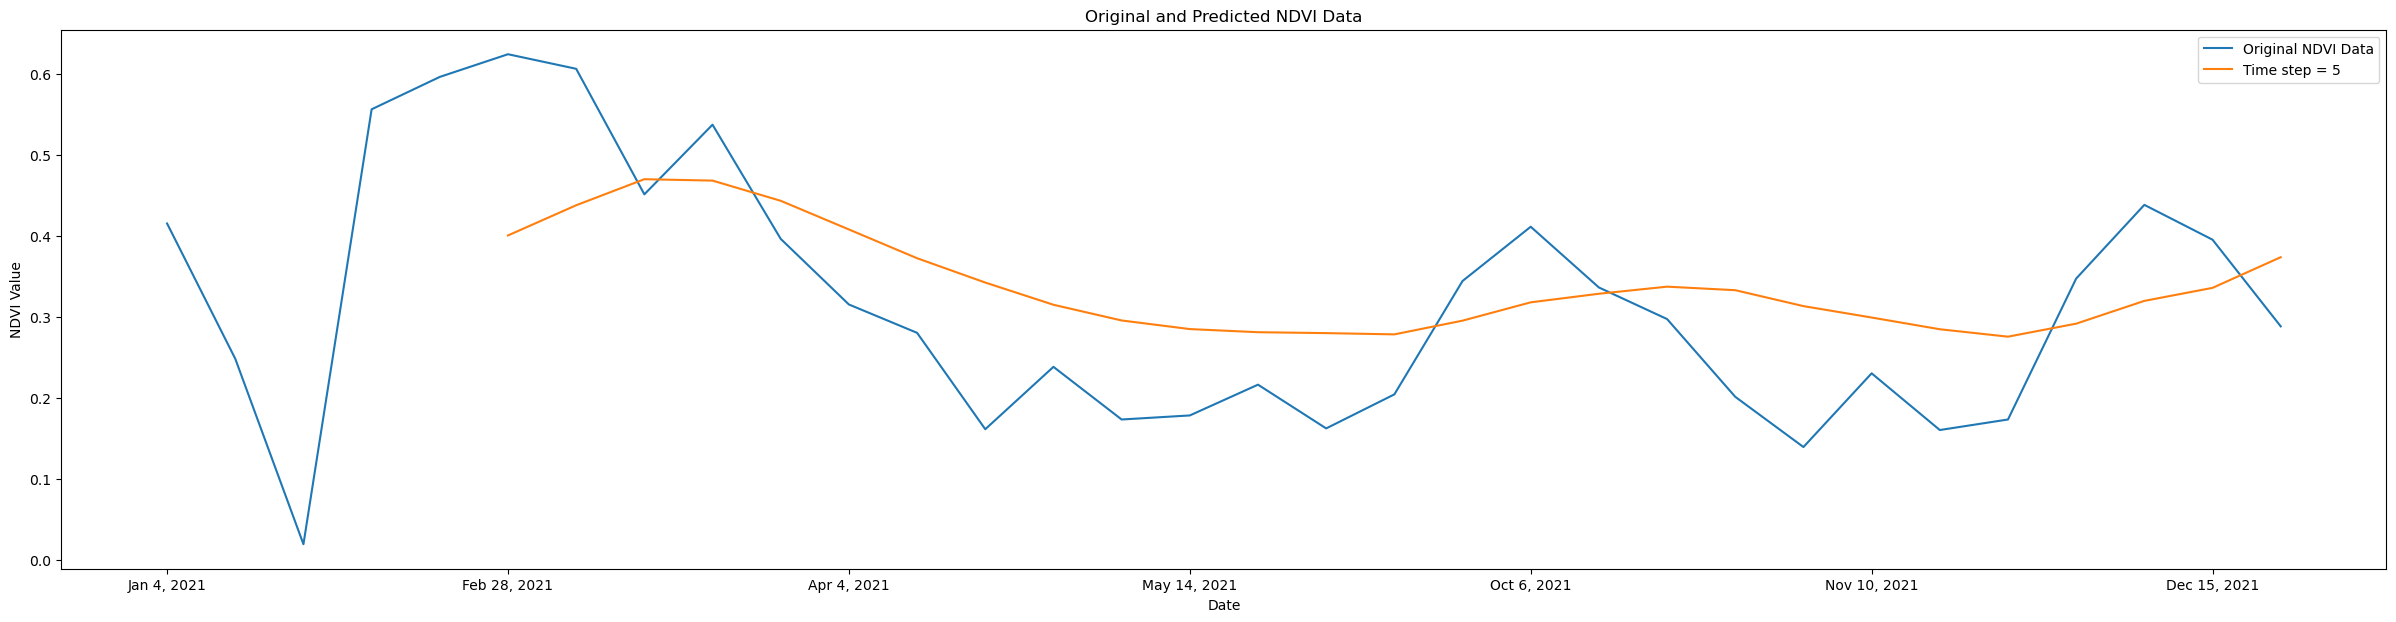

In [165]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,7))
#plt.xticks(rotation =30)
# Plot the original NDVI data
plt.plot(df1['system:time_start'], df1['0'], label='Original NDVI Data')

# Plot the predicted values
# Since you have the predictions for the first 'n_steps' data points, you need to leave some empty space (NaN) in the plot for them
empty_space = np.empty((n_steps, 1))
empty_space[:, :] = np.nan
shifted_y_pred_5 = np.roll(y_pred_5, -1)
plt.plot(np.concatenate([empty_space, shifted_y_pred_5]), label='Time step = 5 ')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Skip every 2 days


# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.title('Original and Predicted NDVI Data')
plt.legend()

import os

# ... (rest of your code)

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Save the graph as a JPEG file
file_path = "E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/bidirectional_lstm_discontinuous2.jpeg"
plt.savefig(file_path, format='jpeg')

# Show the plot
plt.show()




Current Working Directory: E:\pgd\PGD-GI Study Material\final project\NDVI\python docs\2-08-2023\2-08-2023


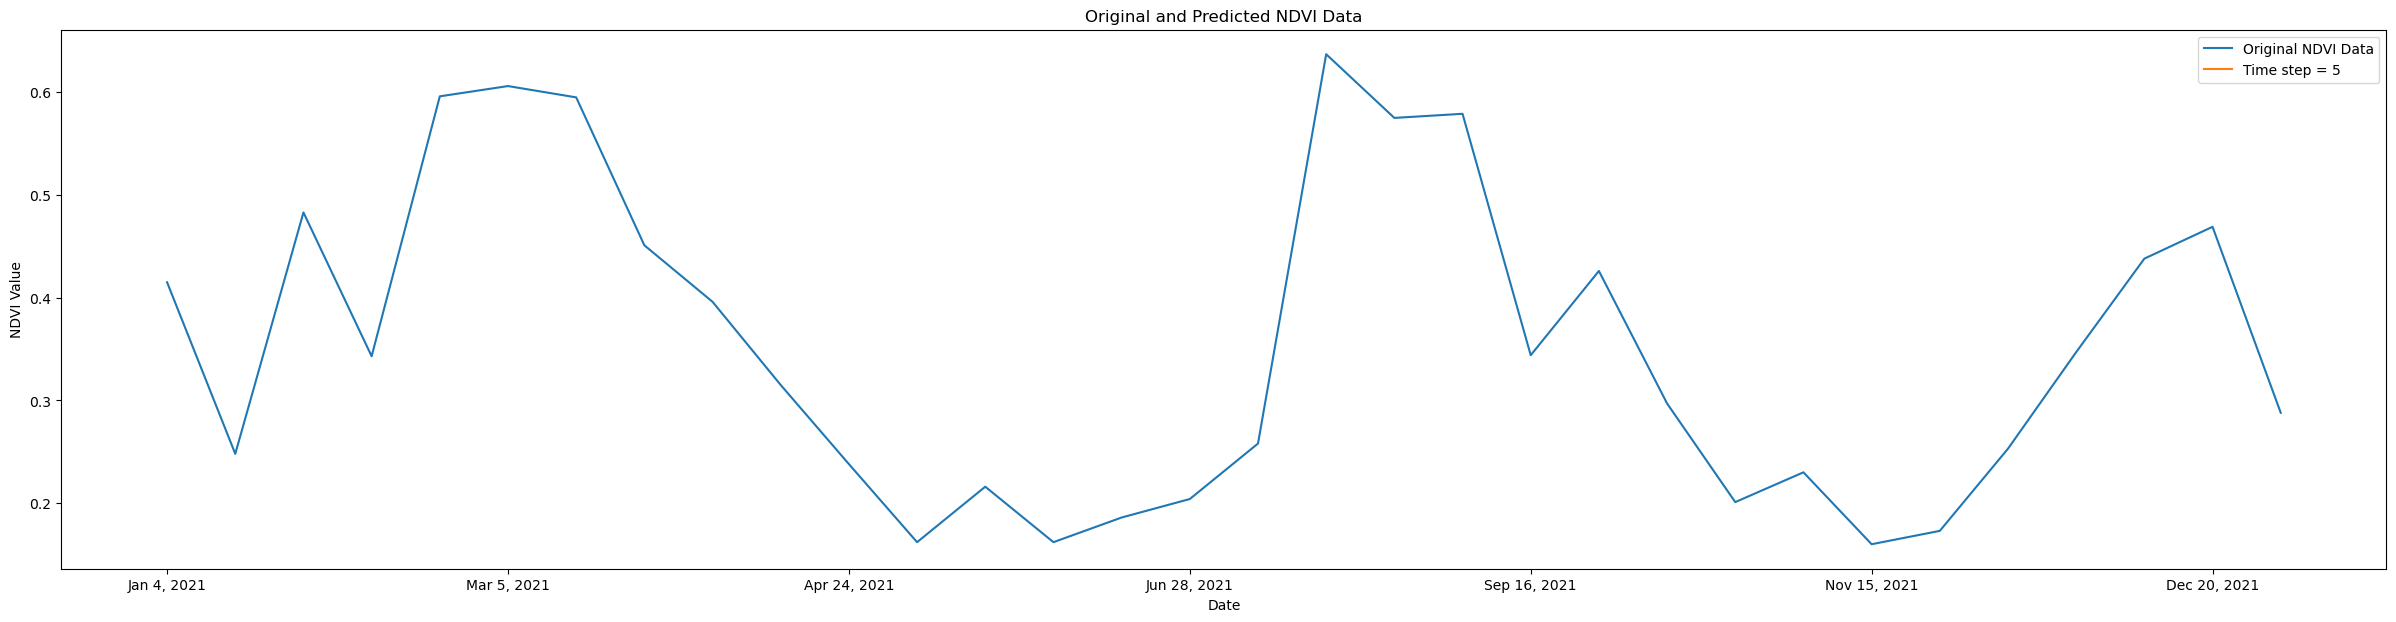

In [123]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(30, 7))
# plt.xticks(rotation=30)

# Plot the original NDVI data
plt.plot(df1['system:time_start'], df1['0'], label='Original NDVI Data')

# Plot the predicted values
# Since you have the predictions for the first 'n_steps' data points, you need to leave some empty space (NaN) in the plot for them
empty_space = np.empty((n_steps, 1))
empty_space[:, :] = np.nan

# Adjust the length of y_pred_5 to match the original data
y_pred_5_adjusted = y_pred_5[:len(df1) - n_steps]

# Shift the adjusted predicted values by one place backward
shifted_y_pred_5 = np.roll(y_pred_5_adjusted, -1)

# Concatenate the empty space and the shifted predicted values
plt.plot(np.concatenate([empty_space, shifted_y_pred_5]), label='Time step = 5 ')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Skip every 2 days

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.title('Original and Predicted NDVI Data')
plt.legend()

import os

# ... (rest of your code)

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Save the graph as a JPEG file
file_path = "E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/bidirectional_lstm_discontinuous2.jpeg"
plt.savefig(file_path, format='jpeg')

# Show the plot
plt.show()


# checking the working of lstm wrt to data with Nan values

In [173]:
#creating a data with Nan values 


# Create a sample data frame
df = pd.DataFrame(data)

# Display the original data frame
print("Original data frame:")
print(df)

# Make a copy of the data frame
random_nan_df = df.copy()

# Defining the  fraction of values to be replaced by Nan
frac = 0.1

# Replace values randomly by Nan in the copy
random_nan_df['0'] = random_nan_df['0'].mask(np.random.random(random_nan_df['0'].shape) < frac)

# Display the modified data frame with 30%NaN values
print("Modified data frame:")
print(random_nan_df)


Original data frame:
   system:time_start      0
0        Jan 4, 2021  0.415
1        Jan 9, 2021  0.248
2       Jan 14, 2021  0.019
3       Jan 19, 2021  0.483
4        Feb 3, 2021  0.343
5        Feb 8, 2021  0.599
6       Feb 18, 2021  0.556
7       Feb 23, 2021  0.596
8       Feb 28, 2021  0.624
9        Mar 5, 2021  0.606
10      Mar 10, 2021  0.595
11      Mar 15, 2021  0.451
12      Mar 20, 2021  0.537
13      Mar 25, 2021  0.396
14      Mar 30, 2021  0.258
15       Apr 4, 2021  0.315
16       Apr 9, 2021  0.280
17      Apr 19, 2021  0.161
18      Apr 24, 2021  0.238
19      Apr 29, 2021  0.173
20       May 4, 2021  0.151
21       May 9, 2021  0.162
22      May 14, 2021  0.178
23      May 24, 2021  0.216
24      May 29, 2021  0.162
25       Jun 3, 2021  0.129
26       Jun 8, 2021  0.186
27      Jun 23, 2021  0.196
28      Jun 28, 2021  0.204
29       Jul 8, 2021  0.258
30      Aug 12, 2021  0.637
31      Aug 17, 2021  0.575
32      Aug 27, 2021  0.579
33      Sep 16, 2021  0.344

In [174]:
x2 = random_nan_df['system:time_start'].values   #date
y2 = random_nan_df['0'].values   #NDVI values
y2

array([0.415, 0.248, 0.019, 0.483, 0.343, 0.599, 0.556, 0.596, 0.624,
       0.606, 0.595, 0.451, 0.537, 0.396, 0.258, 0.315, 0.28 , 0.161,
       0.238, 0.173, 0.151, 0.162, 0.178, 0.216, 0.162, 0.129, 0.186,
       0.196, 0.204, 0.258, 0.637, 0.575, 0.579, 0.344, 0.321, 0.411,
       0.426, 0.336, 0.257,   nan, 0.201, 0.139,   nan, 0.16 , 0.246,
         nan, 0.253, 0.347, 0.438, 0.395, 0.469, 0.288])

In [175]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming you have already created a subset DataFrame and stored it as 'data'
# Replace 'column_name' with the actual name of the column you want to use
column_values = random_nan_df['0'].values

# Convert the column values to a numpy array and reshape it to a 2D array
# This is important to ensure compatibility with MinMaxScaler
dataset = column_values.astype('float32').reshape(-1, 1)

# Normalize the data to the range [0, 1] using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_normalized = scaler.fit_transform(dataset)

# Now you can continue with the rest of your code using 'dataset_normalized'


In [176]:
# Define the number of time steps to consider in each input sequence
n_steps = 3

# Function to create sequences of data
def create_sequences(random_nan_df, n_steps):
    X, y = [], []
    for i in range(len(random_nan_df) - n_steps):
        X.append(random_nan_df[i:i+n_steps])
        y.append(random_nan_df[i+n_steps])
    return np.array(X), np.array(y)

# Create sequences for training
X_train_3, y_train_3 = create_sequences(dataset_normalized, n_steps)

# Reshape the input data to be compatible with the LSTM model
X_train_3 = X_train_3.reshape(X_train_3.shape[0], X_train_3.shape[1], 1)



In [177]:
# Define the Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')



In [178]:
# Train the model
model.fit(X_train_3, y_train_3, epochs=50, batch_size=32)



Epoch 1/50
2/2 [==============================] - 4s 47ms/step - loss: nan
Epoch 2/50
2/2 [==============================] - 0s 29ms/step - loss: nan
Epoch 3/50
2/2 [==============================] - 0s 8ms/step - loss: nan
Epoch 4/50
2/2 [==============================] - 0s 14ms/step - loss: nan
Epoch 5/50
2/2 [==============================] - 0s 19ms/step - loss: nan
Epoch 6/50
2/2 [==============================] - 0s 12ms/step - loss: nan
Epoch 7/50
2/2 [==============================] - 0s 11ms/step - loss: nan
Epoch 8/50
2/2 [==============================] - 0s 15ms/step - loss: nan
Epoch 9/50
2/2 [==============================] - 0s 16ms/step - loss: nan
Epoch 10/50
2/2 [==============================] - 0s 15ms/step - loss: nan
Epoch 11/50
2/2 [==============================] - 0s 17ms/step - loss: nan
Epoch 12/50
2/2 [==============================] - 0s 13ms/step - loss: nan
Epoch 13/50
2/2 [==============================] - 0s 14ms/step - loss: nan
Epoch 14/50
2/2 [=====

In [179]:
# Generate predictions on the training data
y_pred_normalized_3 = model.predict(X_train_3)

# Inverse transform to get the original scale
y_pred_3 = scaler.inverse_transform(y_pred_normalized_3)


2/2 [==============================] - 0s 5ms/step


C:\Users\Dell\AppData\Local\Temp\ipykernel_6776\2785221929.py:34: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig(file_path, format='jpeg')
C:\Users\Dell\AppData\Local\Temp\ipykernel_6776\2785221929.py:34: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig(file_path, format='jpeg')
C:\Users\Dell\AppData\Local\Temp\ipykernel_6776\2785221929.py:34: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig(file_path, format='jpeg')
C:\Users\Dell\AppData\Local\Temp\ipykernel_6776\2785221929.py:34: MatplotlibDeprecationWarning: Support fo

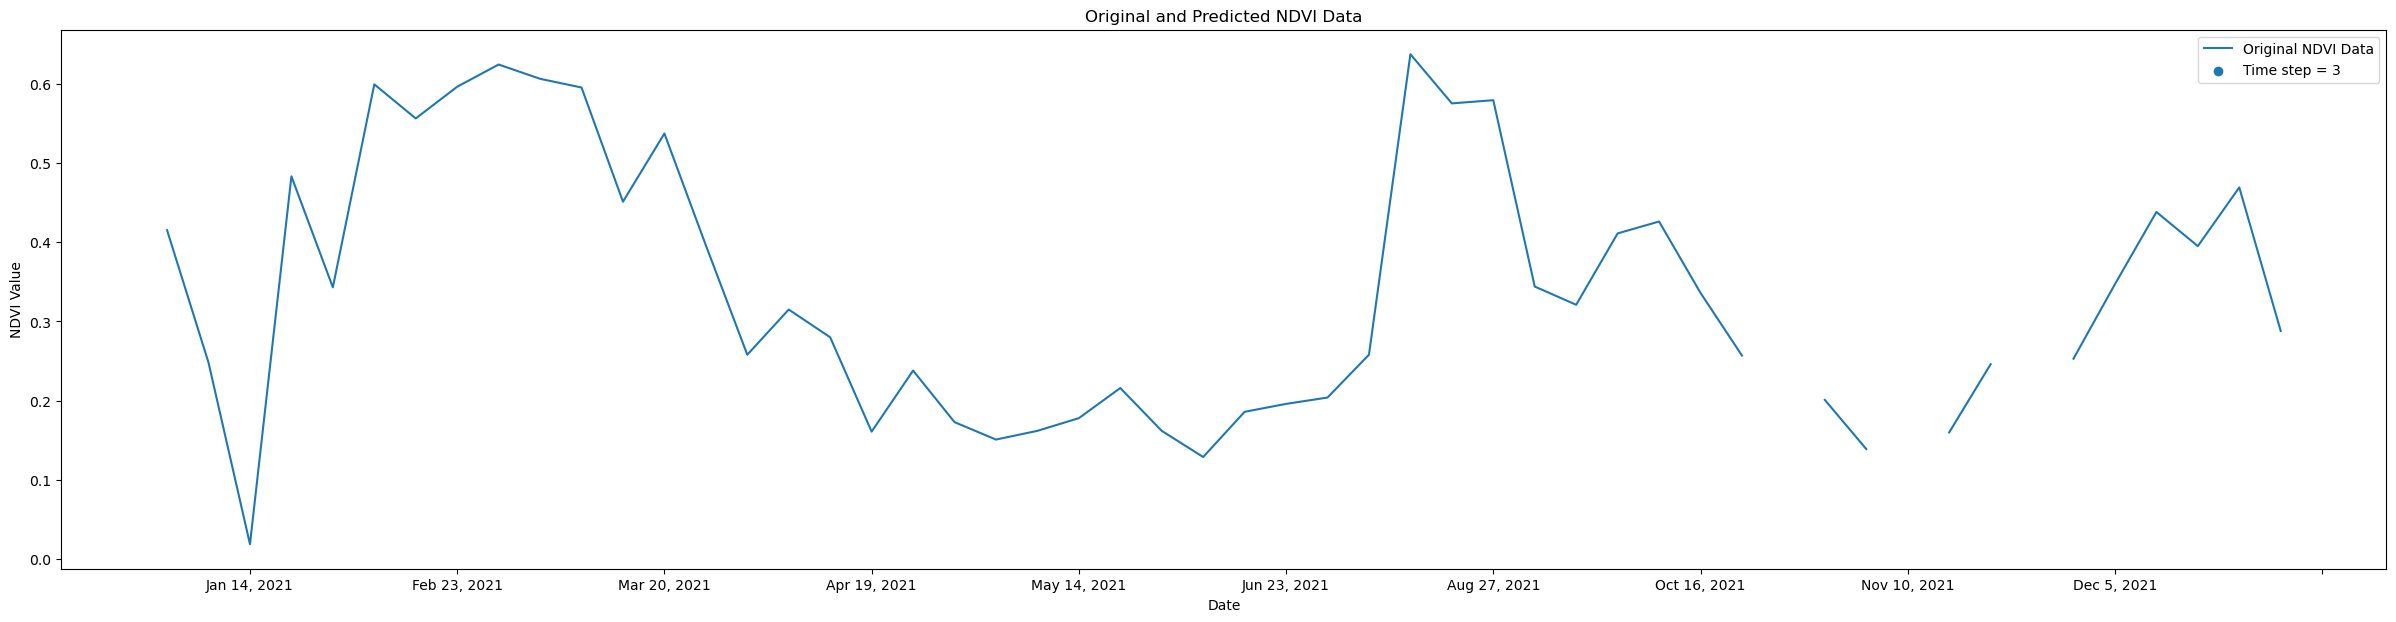

In [184]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

plt.figure(figsize=(30, 7))

# Plot the original NDVI data
plt.plot(random_nan_df['system:time_start'], random_nan_df['0'], label='Original NDVI Data')

# Plot the predicted values
# Since you have the predictions for the first 'n_steps' data points, you need to leave some empty space (NaN) in the plot for them
empty_space = np.empty((n_steps, 1))
empty_space[:, :] = np.nan

# Adjust the length of y_pred_3 to match the original data
y_pred_3_adjusted = y_pred_3[:len(random_nan_df) - n_steps]

# Shift the adjusted predicted values by one place backward
shifted_y_pred_3 = np.roll(y_pred_3_adjusted, -1)

# Concatenate the empty space and the shifted predicted values
plt.scatter(random_nan_df['system:time_start'], np.concatenate([empty_space, shifted_y_pred_3]), label='Time step = 3')

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Skip every 5 days

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.title('Original and Predicted NDVI Data')
plt.legend()

# Save the graph as a JPEG file
file_path = "E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/bidirectional_lstm_discontinuous2.jpeg"
plt.savefig(file_path, format='jpeg')

# Show the plot
plt.show()


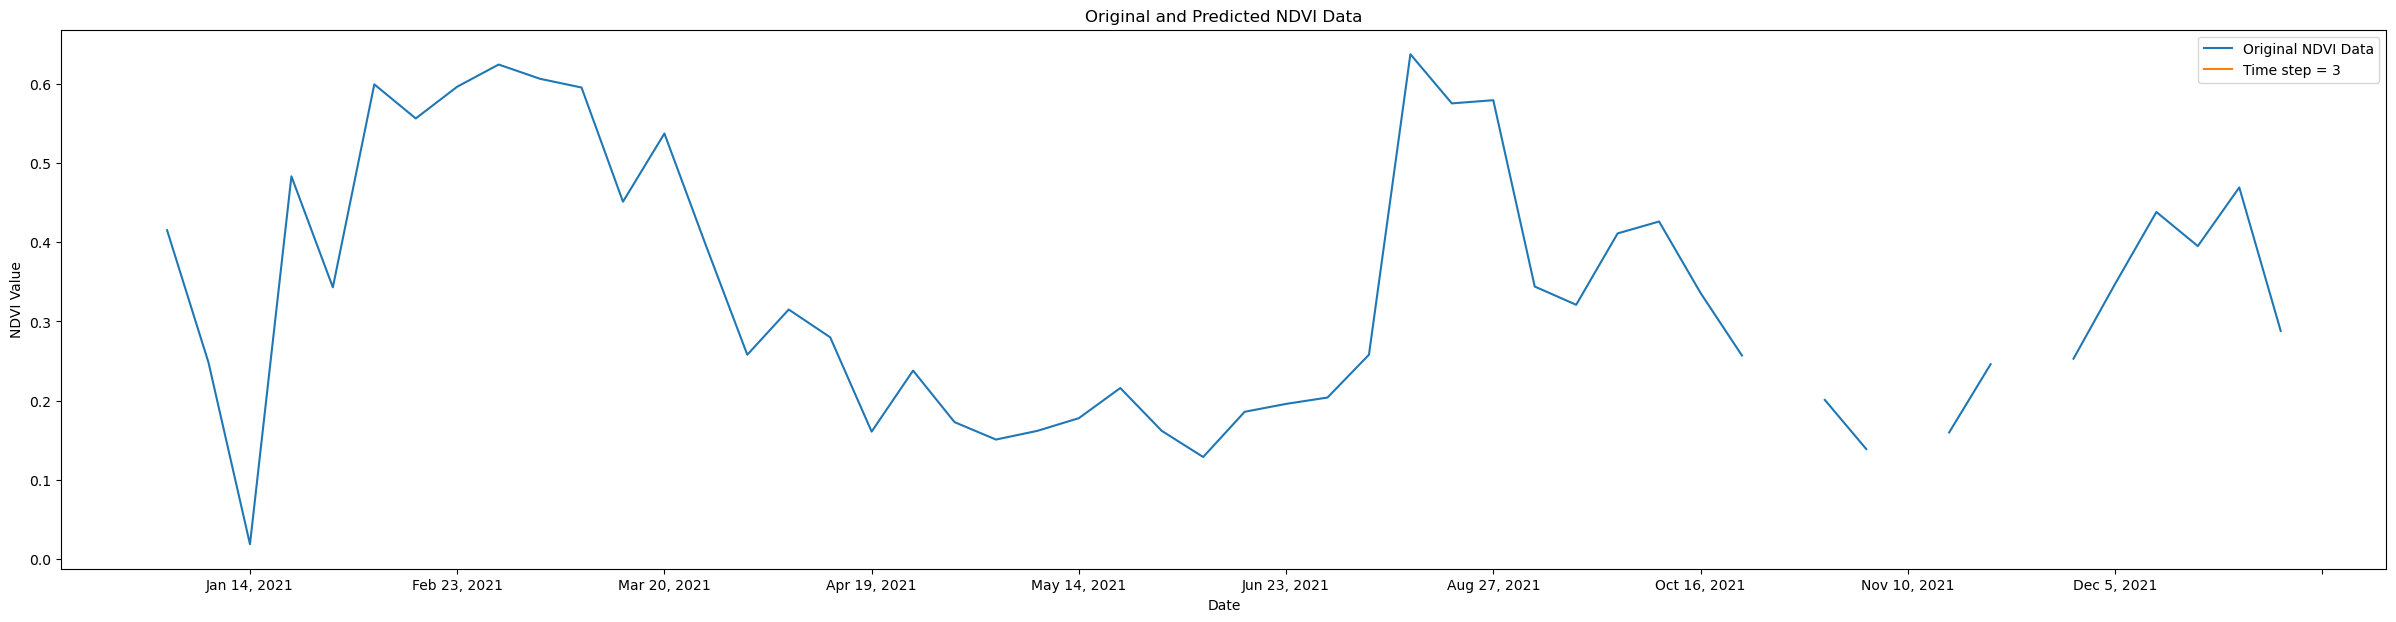

In [183]:
plt.figure(figsize=(30, 7))

# Plot the original NDVI data
plt.plot(random_nan_df['system:time_start'], random_nan_df['0'], label='Original NDVI Data')

# Plot the predicted values
# Since you have the predictions for the first 'n_steps' data points, you need to leave some empty space (NaN) in the plot for them
empty_space = np.empty((n_steps, 1))
empty_space[:, :] = np.nan

# Adjust the length of y_pred_3 to match the original data
y_pred_3_adjusted = y_pred_3[:len(random_nan_df) - n_steps]

# Shift the adjusted predicted values by one place backward
shifted_y_pred_3 = np.roll(y_pred_3_adjusted, -1)

# Concatenate the empty space and the shifted predicted values
plt.plot(np.concatenate([empty_space, shifted_y_pred_3]), label='Time step = 3')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Skip every 5 days

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.title('Original and Predicted NDVI Data')
plt.legend()

# Save the graph as a JPEG file
file_path = "E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/bidirectional_lstm_nan1.jpeg"
plt.savefig(file_path, format='jpeg')

# Show the plot
plt.show()


## lstm nan for time step=5



In [52]:
# Define the number of time steps to consider in each input sequence
n_steps = 5

# Function to create sequences of data
def create_sequences(random_nan_df, n_steps):
    X, y = [], []
    for i in range(len(random_nan_df) - n_steps):
        X.append(random_nan_df[i:i+n_steps])
        y.append(random_nan_df[i+n_steps])
    return np.array(X), np.array(y)

# Create sequences for training
X_train_5, y_train_5 = create_sequences(dataset_normalized, n_steps)

# Reshape the input data to be compatible with the LSTM model
X_train_5 = X_train_5.reshape(X_train_5
                              .shape[0], X_train_5.shape[1], 1)



In [53]:
# Define the Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')



In [54]:
# Train the model
model.fit(X_train_5, y_train_5, epochs=50, batch_size=32)



Epoch 1/50
2/2 [==============================] - 3s 15ms/step - loss: 0.3479
Epoch 2/50
2/2 [==============================] - 0s 6ms/step - loss: 0.3219
Epoch 3/50
2/2 [==============================] - 0s 0s/step - loss: 0.2977
Epoch 4/50
2/2 [==============================] - 0s 13ms/step - loss: 0.2729
Epoch 5/50
2/2 [==============================] - 0s 6ms/step - loss: 0.2499
Epoch 6/50
2/2 [==============================] - 0s 2ms/step - loss: 0.2261
Epoch 7/50
2/2 [==============================] - 0s 8ms/step - loss: 0.2056
Epoch 8/50
2/2 [==============================] - 0s 22ms/step - loss: 0.1852
Epoch 9/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1646
Epoch 10/50
2/2 [==============================] - 0s 6ms/step - loss: 0.1453
Epoch 11/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1280
Epoch 12/50
2/2 [==============================] - 0s 17ms/step - loss: 0.1103
Epoch 13/50
2/2 [==============================] - 0s 7ms/step - loss:

In [55]:
# Generate predictions on the training data
y_pred_normalized_5 = model.predict(X_train_5)

# Inverse transform to get the original scale
y_pred_5 = scaler.inverse_transform(y_pred_normalized_5)


2/2 [==============================] - 0s 20ms/step


Current Working Directory: E:\pgd\PGD-GI Study Material\final project\NDVI\python docs\2-08-2023\2-08-2023


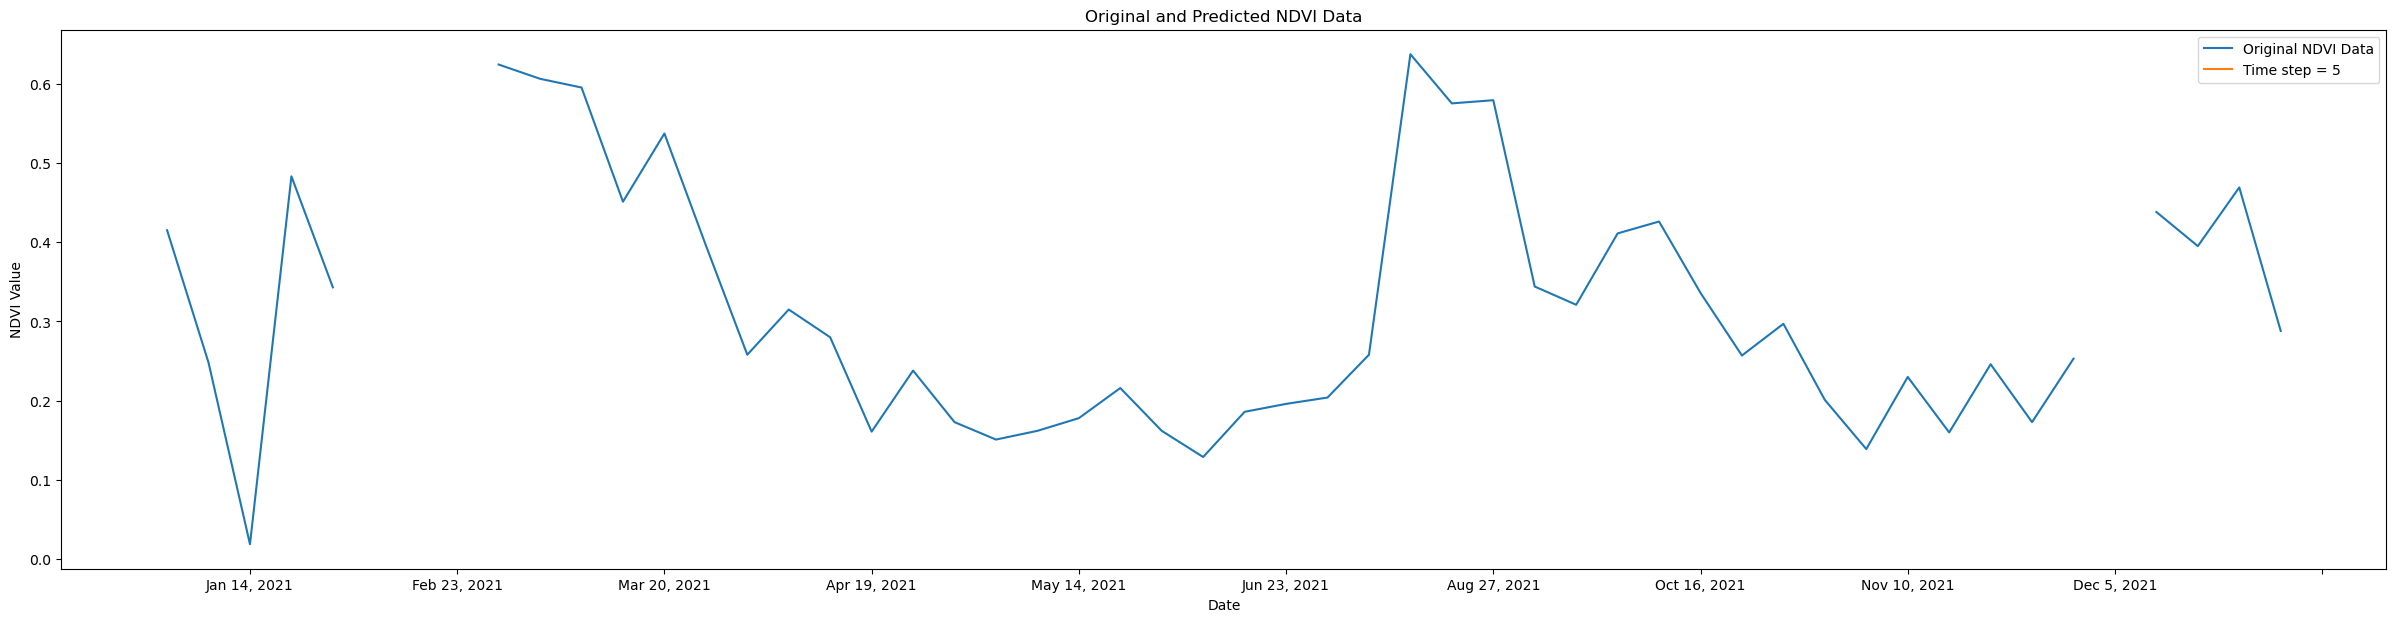

In [119]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(30, 7))
# plt.xticks(rotation=30)

# Plot the original NDVI data
plt.plot(random_nan_df['system:time_start'],random_nan_df['0'], label='Original NDVI Data')

# Plot the predicted values
# Since you have the predictions for the first 'n_steps' data points, you need to leave some empty space (NaN) in the plot for them
empty_space = np.empty((n_steps, 1))
empty_space[:, :] = np.nan

# Adjust the length of y_pred_5 to match the original data
y_pred_5_adjusted = y_pred_5[:len(random_nan_df) - n_steps]

# Shift the adjusted predicted values by one place backward
shifted_y_pred_5 = np.roll(y_pred_5_adjusted, -1)

# Concatenate the empty space and the shifted predicted values
plt.plot(np.concatenate([empty_space, shifted_y_pred_5]), label='Time step = 5 ')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Skip every 2 days

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.title('Original and Predicted NDVI Data')
plt.legend()

import os

# ... (rest of your code)

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Save the graph as a JPEG file
file_path = "E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/bidirectional_lstm_discontinuous2.jpeg"
plt.savefig(file_path, format='jpeg')

# Show the plot
plt.show()


# Combined Graphs 

In [56]:
#savgol

In [57]:
#import the essential library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, general_gaussian
import statsmodels

In [58]:
#loading of the data

data=pd.read_csv("E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p1.csv")
#values put into different array
x = data['date'].values   #date
y = data['NDVI_p1'].values   #NDVI values


In [59]:
data_copy1= data.copy()


In [60]:
data_copy1['date'] = pd.to_datetime(data_copy1['date'])
print(data_copy1.dtypes)
import pandas as pddate

# Assuming 'system:time_start' is already in a datetime format
data_copy1['Month'] = data_copy1['date'].dt.strftime('%b')



date       datetime64[ns]
NDVI_p1           float64
dtype: object


In [61]:
w2=5
p2=2
y_smooth_3 = savgol_filter(y, w2, polyorder = p2, deriv=0)


In [62]:
# moving average 

In [63]:
w=5
y_smoving_average=np.convolve(data['NDVI_p1'],np.ones(w),mode='same')
y_smoving_average /= w

In [64]:
#bidirectional-Lstm
n=np.concatenate([empty_space, y_pred_5_for])


In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset using pandas read_csv
data = pd.read_csv('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p1.csv')

# Convert the NDVI data column to a NumPy array
ndvi_data = data['NDVI_p1'].values
ndvi_data = ndvi_data.reshape(-1, 1)

# Normalize the NDVI data to the range [0, 1] using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
ndvi_data_normalized = scaler.fit_transform(ndvi_data)

# Print the normalized NDVI data
print(ndvi_data_normalized)


[[0.80571662]
 [0.64139392]
 [0.0132303 ]
 [0.78998705]
 [0.1200552 ]
 [0.91307704]
 [0.8510234 ]
 [0.98450735]
 [0.94638879]
 [1.        ]
 [0.85727126]
 [0.72906429]
 [0.78966953]
 [0.57651189]
 [0.41453642]
 [0.73450857]
 [0.48486151]
 [0.26767745]
 [0.3358269 ]
 [0.25583753]
 [0.19591923]
 [0.26804504]
 [0.34553637]
 [0.50939256]
 [0.33261443]
 [0.41674686]
 [0.38632089]
 [0.59266523]
 [0.45242172]
 [0.41328465]
 [0.44465341]
 [0.59548996]
 [0.7094585 ]
 [0.74062515]
 [0.00225459]
 [0.2521042 ]
 [0.85847724]
 [0.60157174]
 [0.46815861]
 [0.51553661]
 [0.32566435]
 [0.        ]
 [0.48667383]
 [0.3845965 ]
 [0.66679571]
 [0.41254458]
 [0.78754824]
 [0.71946778]
 [0.79732548]
 [0.62256851]
 [0.80145572]
 [0.4356944 ]]


In [66]:
# LSTM
# Define the number of time steps to consider in each input sequence
n_steps = 5

# Function to create sequences of data
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Create sequences for training
X_train, y_train = create_sequences(ndvi_data_normalized, n_steps)


In [67]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
2/2 [==============================] - 2s 23ms/step - loss: 0.4153
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 0.3923
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 0.3713
Epoch 4/100
2/2 [==============================] - 0s 0s/step - loss: 0.3520
Epoch 5/100
2/2 [==============================] - 0s 17ms/step - loss: 0.3329
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 0.3153
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 0.2984
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2830
Epoch 9/100
2/2 [==============================] - 0s 0s/step - loss: 0.2673
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 0.2529
Epoch 11/100
2/2 [==============================] - 0s 18ms/step - loss: 0.2384
Epoch 12/100
2/2 [==============================] - 0s 8ms/step - loss: 0.2255
Epoch 13/100
2/2 [==============================] - 0s 7ms

In [69]:
# Function to generate predictions from the LSTM model
def generate_predictions(model, data, n_steps):
    predictions = []
    for i in range(len(data) - n_steps):
        x_input = data[i:i+n_steps].reshape(1, n_steps, 1)
        y_pred = model.predict(x_input)
        predictions.append(y_pred[0, 0])
    return np.array(predictions)

# Generate predictions
X_pred = ndvi_data_normalized[:n_steps].reshape(1, n_steps, 1)
y_pred_normalized = generate_predictions(model, ndvi_data_normalized, n_steps)

# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred_normalized.reshape(-1, 1))


1/1 [==============================] - 0s 33ms/step


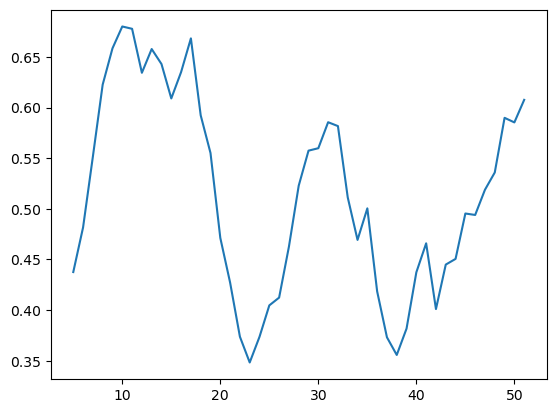

In [32]:


# Plot the predicted values
# Since you have the predictions for the first 'n_steps' data points, you need to leave some empty space (NaN) in the plot for them
empty_space = np.empty((n_steps, 1))
empty_space[:, :] = np.nan
plt.plot(np.concatenate([empty_space, y_pred]), label='Time step= 3')



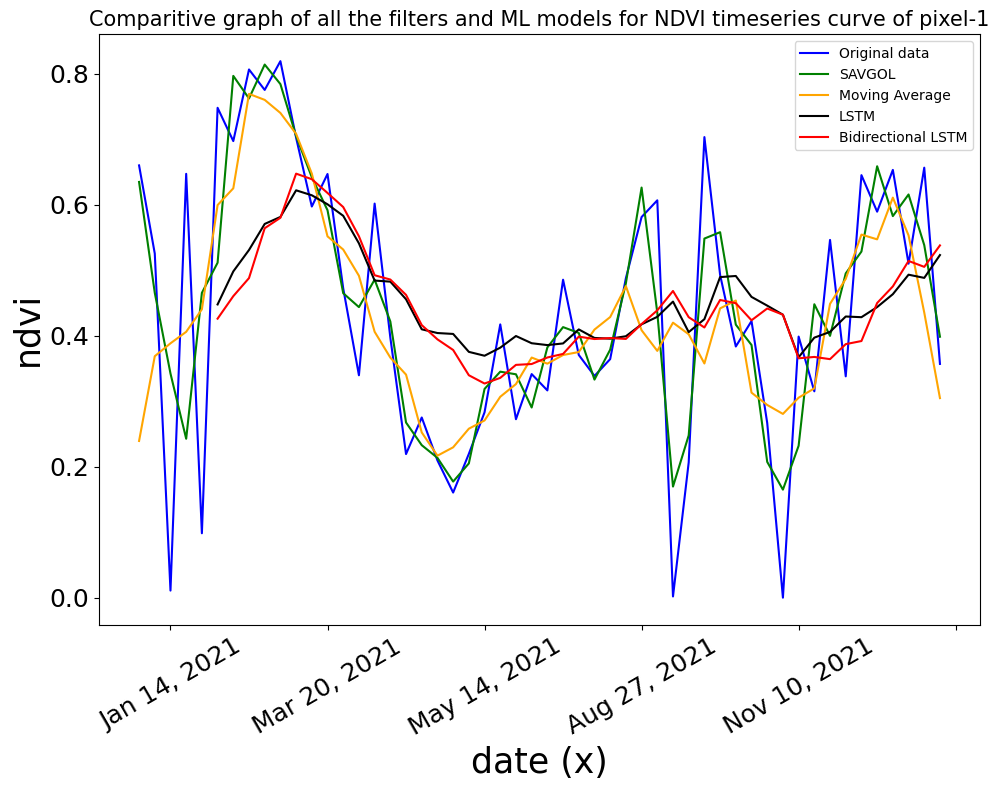

In [70]:
plt.figure(figsize=(10,8))
interval = np.arange(50)
plt.plot(x, y, 'b', label = 'Original data')
plt.yticks(fontsize=18)
plt.xticks(rotation=30,fontsize =18)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Skip every 2 days
plt.plot(x, y_smooth_3, 'g', label = 'SAVGOL')

plt.plot(x, y_smoving_average, 'orange', label = 'Moving Average')
plt.plot(np.concatenate([empty_space, y_pred]),'black' ,label='LSTM')
plt.plot(n,'r', label="Bidirectional LSTM")
plt.xlabel("date (x)",fontsize=25)
plt.ylabel("ndvi",fontsize=25)
plt.title('Comparitive graph of all the filters and ML models for NDVI timeseries curve of pixel-1',fontsize=15)
plt.tight_layout()
plt.legend(loc='upper right', fontsize=10)


plt.savefig('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/new graphs/ALL_p1.png')  # Change 'output_graph.png' to your desired file name

plt.show()